# Results for predicates planning and ViLa planning

In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

ROOT = os.path.dirname(os.path.dirname(os.path.abspath('.')))
print("ROOT", ROOT)

ROOT /scratch/cs/world-models/merlerm1/open-world-symbolic-planner


In [2]:
sys.path.append(ROOT)

In [3]:
FIGURES_FOLDER = os.path.join(ROOT, 'results', 'figures')
if not os.path.exists(FIGURES_FOLDER):
    os.makedirs(FIGURES_FOLDER)

In [4]:
def save_fig(fig, name):
    if not name.lower().endswith('.pdf'):
        name = f"{name}.pdf"
    fig.savefig(
        os.path.join(FIGURES_FOLDER, name),
        format='pdf',
        bbox_inches='tight',
        dpi=300
    )
    plt.close(fig)

In [5]:
experiment_folder = os.path.join(ROOT, 'results', 'planning', 'blocksworld', 'run_26_04_25')
assert os.path.exists(experiment_folder), f"Experiment folder {experiment_folder} does not exist"

predicates_folder = os.path.join(experiment_folder, 'predicates')
vila_folder = os.path.join(experiment_folder, 'vila')
assert os.path.exists(predicates_folder), f"Predicates folder {predicates_folder} does not exist"
assert os.path.exists(vila_folder), f"Vila folder {vila_folder} does not exist"

# List the content of the predicates folder
splits = os.listdir(predicates_folder)
assert len(splits) > 0, f"No splits found in {predicates_folder}"
assert splits == os.listdir(vila_folder), f"Predicates and Vila folders do not match: {predicates_folder} vs {vila_folder}"
splits.sort(reverse=True)
print("Splits:", splits)

Splits: ['simple', 'medium', 'hard']


In [6]:
def load_results(folder):
    """
    Load the results from a folder.
    """
    results = defaultdict(dict)
    for split in splits:
        results[split] = defaultdict(dict)
        split_folder = os.path.join(folder, split)
        if not os.path.exists(split_folder):
            print(f"Split folder {split_folder} does not exist")
            continue
        models = os.listdir(split_folder)
        for model in models:
            model_folder = os.path.join(split_folder, model)
            print(f"Loading {model_folder}")
            contents = os.listdir(model_folder)
            if len(contents) == 0:
                print(f"Model folder {model_folder} is empty")
                continue
            if len(contents) > 1:
                print(f"Model folder {model_folder} has more than one file, defaulting to most recent")
            
            results_file = os.path.join(model_folder, sorted(contents)[-1])
            with open(results_file, 'r') as f:
                data = json.load(f)
            results[split][model] = data
    return results

In [7]:
predicates_results = load_results(predicates_folder)
print()
vila_results = load_results(vila_folder)

Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/InternVL3-8B
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/gpt-4.1
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/InternVL3-78B
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/gemma-3-12b-it
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/gemma-3-27b-it
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/llava-onevision-qwen2-7b-ov-hf
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/s

## Predicates

In [8]:
expected_models = set([
    "llava-onevision-qwen2-7b-ov-hf",
    "Qwen2.5-VL-7B-Instruct",
    "aya-vision-8b",
    "gemma-3-12b-it",
    "deepseek-vl2",
    "Phi-4-multimodal-instruct",
    "Molmo-7B-D-0924",
    "Mistral-Small-3.1-24B-Instruct-2503",
    "InternVL3-8B",
    "llava-onevision-qwen2-72b-ov-hf",
    "Qwen2.5-VL-72B-Instruct",
    "aya-vision-32b",
    "gemma-3-27b-it",
    "InternVL3-78B",
    "gpt-4.1",
    "gpt-4.1-nano",
])

In [9]:
vlm_models_by_size = {
    "small": [
        "deepseek-vl2",               # ~4.5B (activated)
        "Phi-4-multimodal-instruct",  # ~5.6B
        "Molmo-7B-D-0924",            # 7B
        "llava-onevision-qwen2-7b-ov-hf",  # 7B
        "Qwen2.5-VL-7B-Instruct",     # 7B
        "aya-vision-8b",              # 8B
        "InternVL3-8B",               # 8B
    ],
    "medium": [
        "gemma-3-12b-it",             # 12B
        "Mistral-Small-3.1-24B-Instruct-2503",  # 24B
        "gemma-3-27b-it",             # 27B
        "aya-vision-32b",             # 32B
    ],
    "large": [
        "llava-onevision-qwen2-72b-ov-hf",  # 72B
        "Qwen2.5-VL-72B-Instruct",         # 72B
        "InternVL3-78B",                   # 78B
    ],
    "closed_models": [
        "gpt-4.1",
        "gpt-4.1-nano",
    ]
}

In [10]:
# color_map = {
#     "llava-onevision-qwen2-7b-ov-hf": "#E377EB",
#     "llava-onevision-qwen2-72b-ov-hf": "#E584ED",
#     "Qwen2.5-VL-7B-Instruct": "#3458B0",
#     "Qwen2.5-VL-72B-Instruct": "#80A8E0",
#     "aya-vision-8b": "#3AA655",
#     "aya-vision-32b": "#A8E080",
#     "gemma-3-12b-it": "#9467BD",
#     "gemma-3-27b-it": "#BD9467",
#     "deepseek-vl2": "#8C564B",
#     "Phi-4-multimodal-instruct": "#0A3235",
#     "Molmo-7B-D-0924": "#F0529C",
#     "Mistral-Small-3.1-24B-Instruct-2503": "#FF6A00",
#     "InternVL3-8B": "#D62728",
#     "InternVL3-78B": "#FF9896",
#     "gpt-4.1": "#10A37F",
#     "gpt-4.1-nano": "#74AA9C",
# }

color_map = {
    "llava-onevision-qwen2-7b-ov-hf": "#A569BD",
    "llava-onevision-qwen2-72b-ov-hf": "#6A0DAD",
    "Qwen2.5-VL-7B-Instruct": "#AEC7E8",
    "Qwen2.5-VL-72B-Instruct": "#1F77B4",
    "aya-vision-8b": "#98DF8A",
    "aya-vision-32b": "#2CA02C",
    "gemma-3-12b-it": "#e2f78b",
    "gemma-3-27b-it": "#ccff00",
    "deepseek-vl2": "#7F7F7F",
    "Phi-4-multimodal-instruct": "#FFD700",
    "Molmo-7B-D-0924": "#E377C2",
    "Mistral-Small-3.1-24B-Instruct-2503": "#FF7F0E",
    "InternVL3-8B": "#FF9896",
    "InternVL3-78B": "#D62728",
    "gpt-4.1": "#17A2B8",
    "gpt-4.1-nano": "#9ad9e3",
}


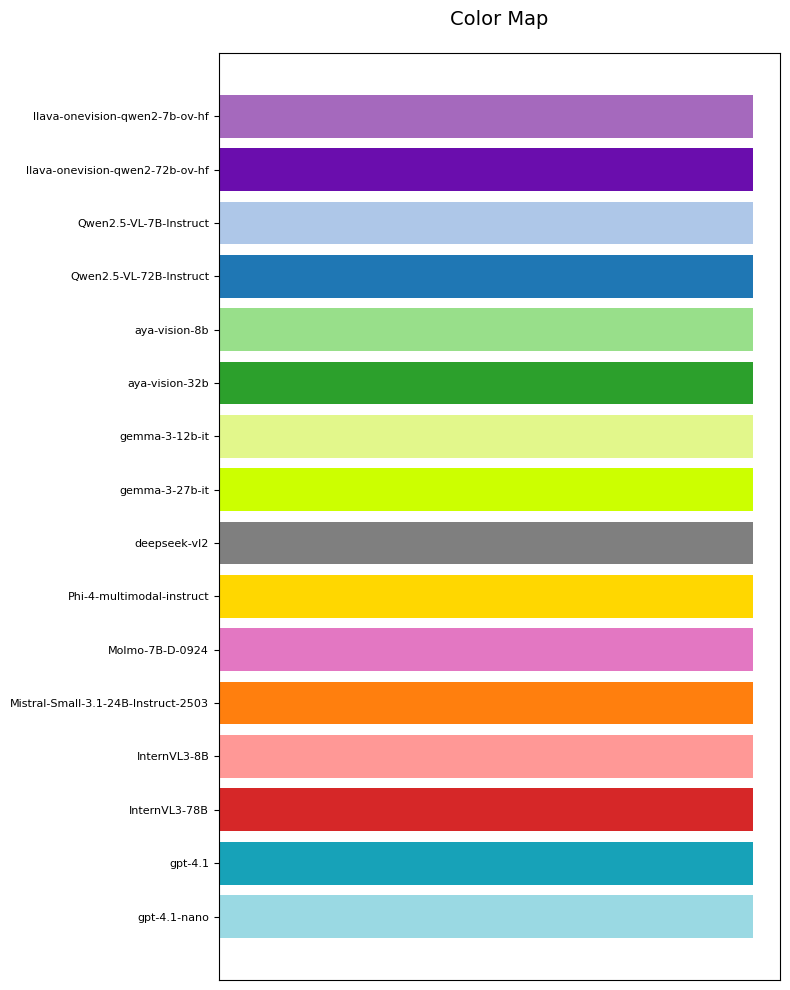

In [11]:
fig, ax = plt.subplots(figsize=(8, 10))
model_names = list(color_map.keys())
colors = list(color_map.values())
y_positions = range(len(model_names))

ax.barh(y_positions, [1] * len(model_names), color=colors)
ax.set_yticks(y_positions)
ax.set_yticklabels(model_names, fontsize=8)
ax.invert_yaxis()
ax.set_xticks([])
ax.set_title('Color Map', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [12]:
def list_models(results):
    """
    List the models in the results.
    """
    models = {split: set() for split in splits}
    for split in splits:
        for model in results[split]:
            models[split].add(model)
            
    # Compare the models across splits and print if some are missing
    for split in splits:
        for other_split in splits:
            if split == other_split:
                continue
            missing_models = models[split] - models[other_split]
            if len(missing_models) > 0:
                print(f"Missing models in {other_split} compared to {split}: {missing_models}")
                
    # Check if all expected models are present
    for split in splits:
        missing_models = expected_models - models[split]
        if len(missing_models) > 0:
            print(f"Missing models in {split}: {missing_models}")
        else:
            print(f"All expected models are present in {split}")
    
    return models

predicates_models = list_models(predicates_results)
predicates_models

All expected models are present in simple
All expected models are present in medium
All expected models are present in hard


{'simple': {'InternVL3-78B',
  'InternVL3-8B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Molmo-7B-D-0924',
  'Phi-4-multimodal-instruct',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-vision-32b',
  'aya-vision-8b',
  'deepseek-vl2',
  'gemma-3-12b-it',
  'gemma-3-27b-it',
  'gpt-4.1',
  'gpt-4.1-nano',
  'llava-onevision-qwen2-72b-ov-hf',
  'llava-onevision-qwen2-7b-ov-hf'},
 'medium': {'InternVL3-78B',
  'InternVL3-8B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Molmo-7B-D-0924',
  'Phi-4-multimodal-instruct',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-vision-32b',
  'aya-vision-8b',
  'deepseek-vl2',
  'gemma-3-12b-it',
  'gemma-3-27b-it',
  'gpt-4.1',
  'gpt-4.1-nano',
  'llava-onevision-qwen2-72b-ov-hf',
  'llava-onevision-qwen2-7b-ov-hf'},
 'hard': {'InternVL3-78B',
  'InternVL3-8B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Molmo-7B-D-0924',
  'Phi-4-multimodal-instruct',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-

In [13]:
def construct_main_table(results):
    rows = []
    for split in splits:
        for model, data in results.get(split, {}).items():
            # Safely round metrics, leaving NaN as is
            ta = results.get(split, {})[model].get('task_accuracy', np.nan)
            aa = results.get(split, {})[model].get('action_accuracy', np.nan)
            pa = results.get(split, {})[model].get('predicate_accuracy', np.nan)
            mpa = results.get(split, {})[model].get('macro_predicate_accuracy', np.nan)
            fr = results.get(split, {})[model].get('fail_ratio', np.nan)
            rows.append({
                'model': model,
                'split': split,
                'predicate accuracy': np.nan if pd.isna(pa) else round(pa, 3),
                'macro predicate accuracy': np.nan if pd.isna(mpa) else round(mpa, 3),
                'action accuracy': np.nan if pd.isna(aa) else round(aa, 2),
                'task accuracy': np.nan if pd.isna(ta) else round(ta, 4),
                'starting ratio': np.nan if pd.isna(1-fr) else round(1-fr, 2),
            })
    df = pd.DataFrame(rows)
    df['split'] = pd.Categorical(df['split'], categories=['simple', 'medium', 'hard'], ordered=True)
    df = df.sort_values(by=['model', 'split'])
    return df

predicates_main_table = construct_main_table(predicates_results)
predicates_main_table

,model,split,predicate accuracy,macro predicate accuracy,action accuracy,task accuracy,starting ratio
2,InternVL3-78B,simple,0.997,0.997,0.94,0.92,1.00
18,InternVL3-78B,medium,0.991,0.991,0.87,0.80,1.00
34,InternVL3-78B,hard,0.979,0.979,0.71,0.56,0.96
0,InternVL3-8B,simple,0.968,0.926,0.26,0.32,0.92
16,InternVL3-8B,medium,0.953,0.906,0.07,0.00,0.72
32,InternVL3-8B,hard,0.921,0.884,0.03,0.00,0.96
14,Mistral-Small-3.1-24B-Instruct-2503,simple,0.989,0.973,0.62,0.40,0.68
30,Mistral-Small-3.1-24B-Instruct-2503,medium,0.958,0.920,0.01,0.00,0.36
46,Mistral-Small-3.1-24B-Instruct-2503,hard,0.957,0.932,0.02,0.00,0.32
13,Molmo-7B-D-0924,simple,0.940,0.909,0.34,0.52,0.92


In [14]:
predicates_main_table.to_csv("predicates_main_table.csv")

In [ ]:
print(predicates_main_table.to_latex(index=False, float_format="%.2f", escape=False, column_format='lcccccc', multirow=True))

/tmp/ipykernel_3804980/836794087.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3804980/836794087.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_3804980/836794087.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3804980/836794087.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_3804980/836794087.py:13: FutureWarnin

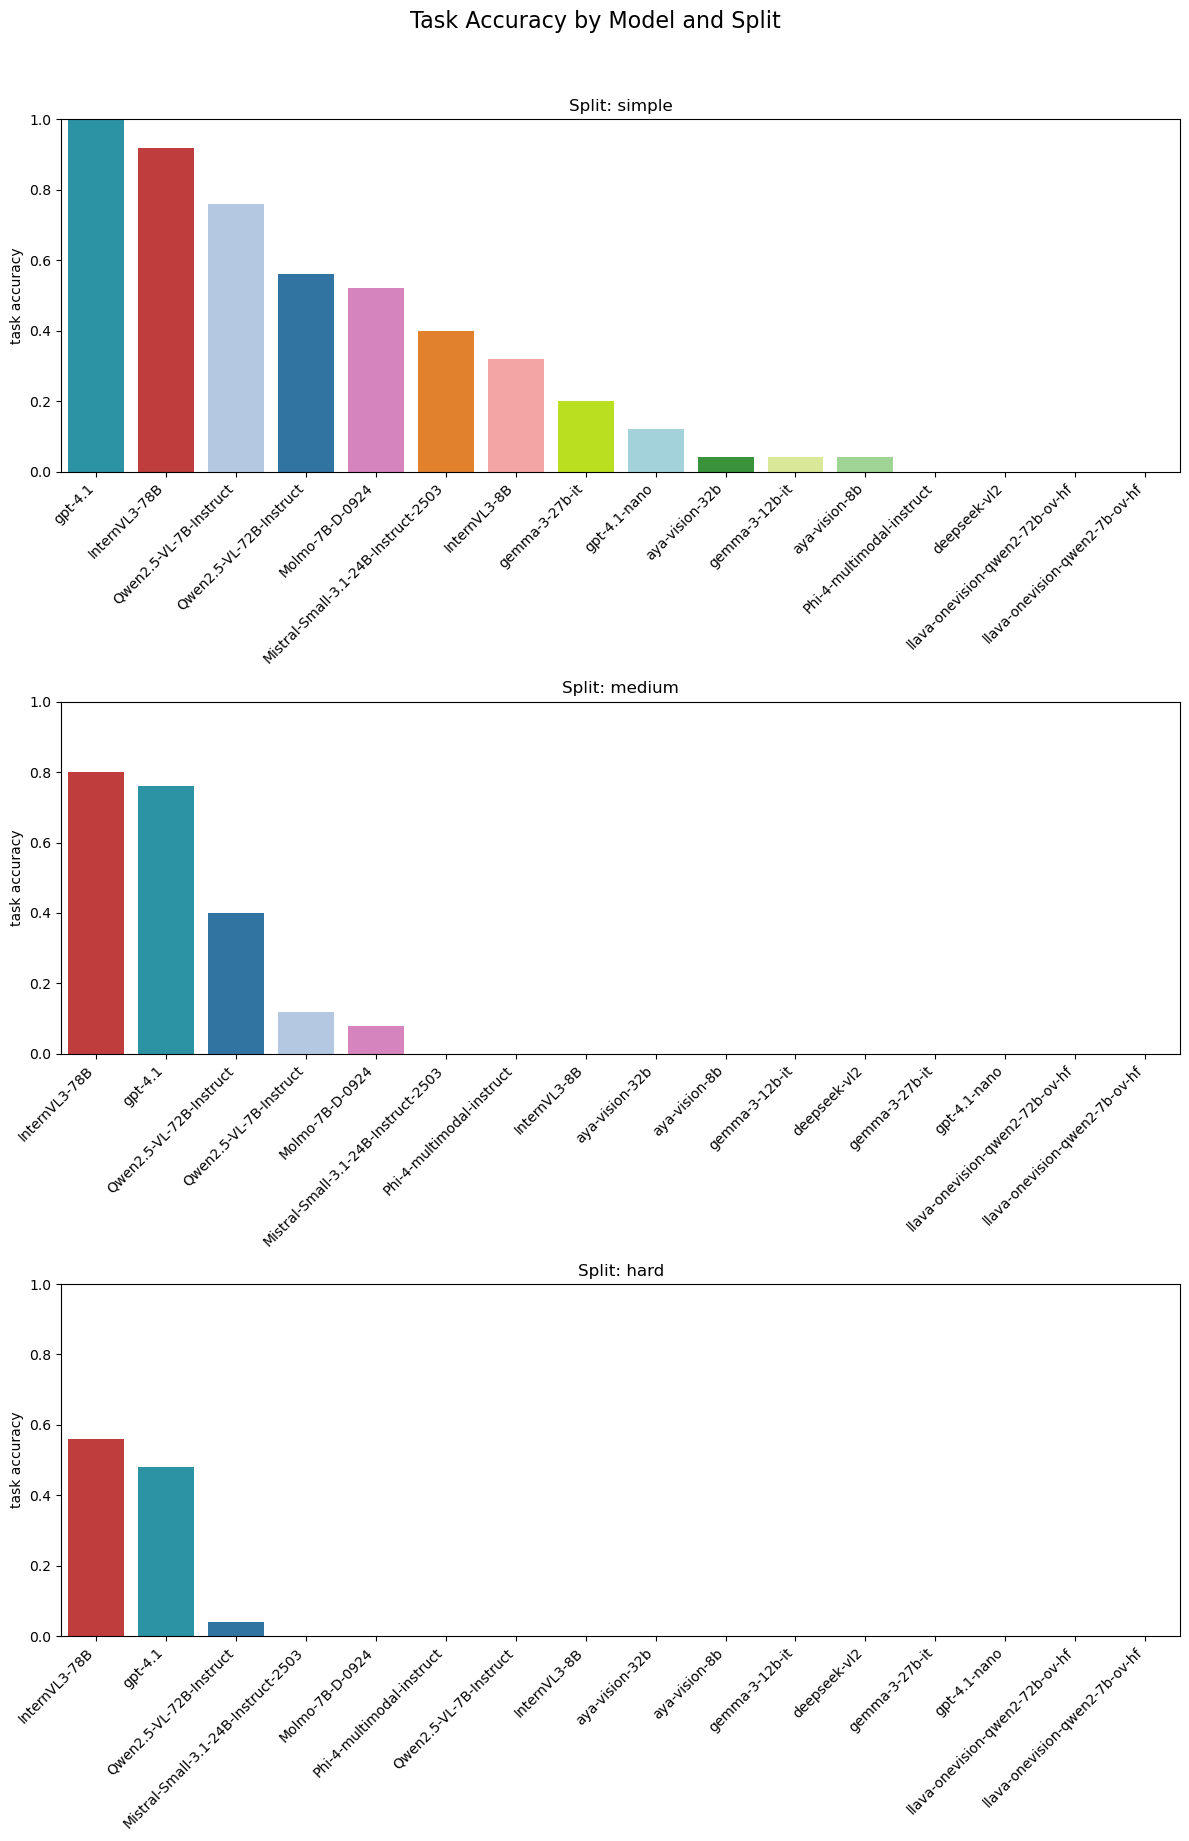

In [15]:
def plot_task_accuracy_bar(main_table):
    """
    Plot a 3×1 grid of barplots for task accuracy by model,
    one subplot per split, sorted descending, using color_map.
    """
    fig, axes = plt.subplots(len(splits), 1, figsize=(12, 18), sharey=True)
    for ax, split in zip(axes, splits):
        df_split = main_table[main_table['split'] == split]
        if df_split.empty:
            ax.set_visible(False)
            continue
        df_sorted = df_split.sort_values('task accuracy', ascending=False)
        sns.barplot(
            data=df_sorted,
            x='model', y='task accuracy',
            palette=color_map,
            ax=ax
        )
        ax.set_title(f"Split: {split}")
        ax.set_ylim(0, 1)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_xlabel('')
    fig.suptitle("Task Accuracy by Model and Split", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_task_accuracy_bar(predicates_main_table)


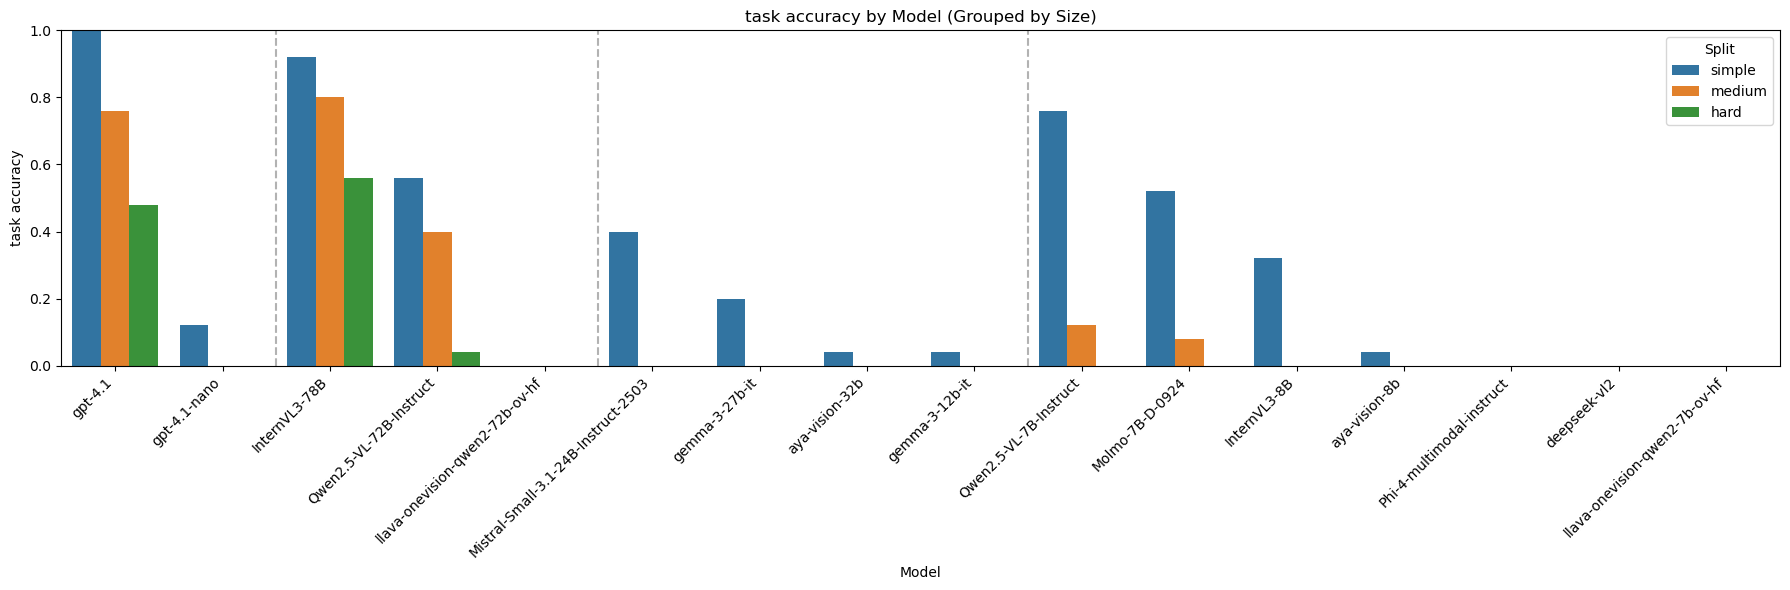

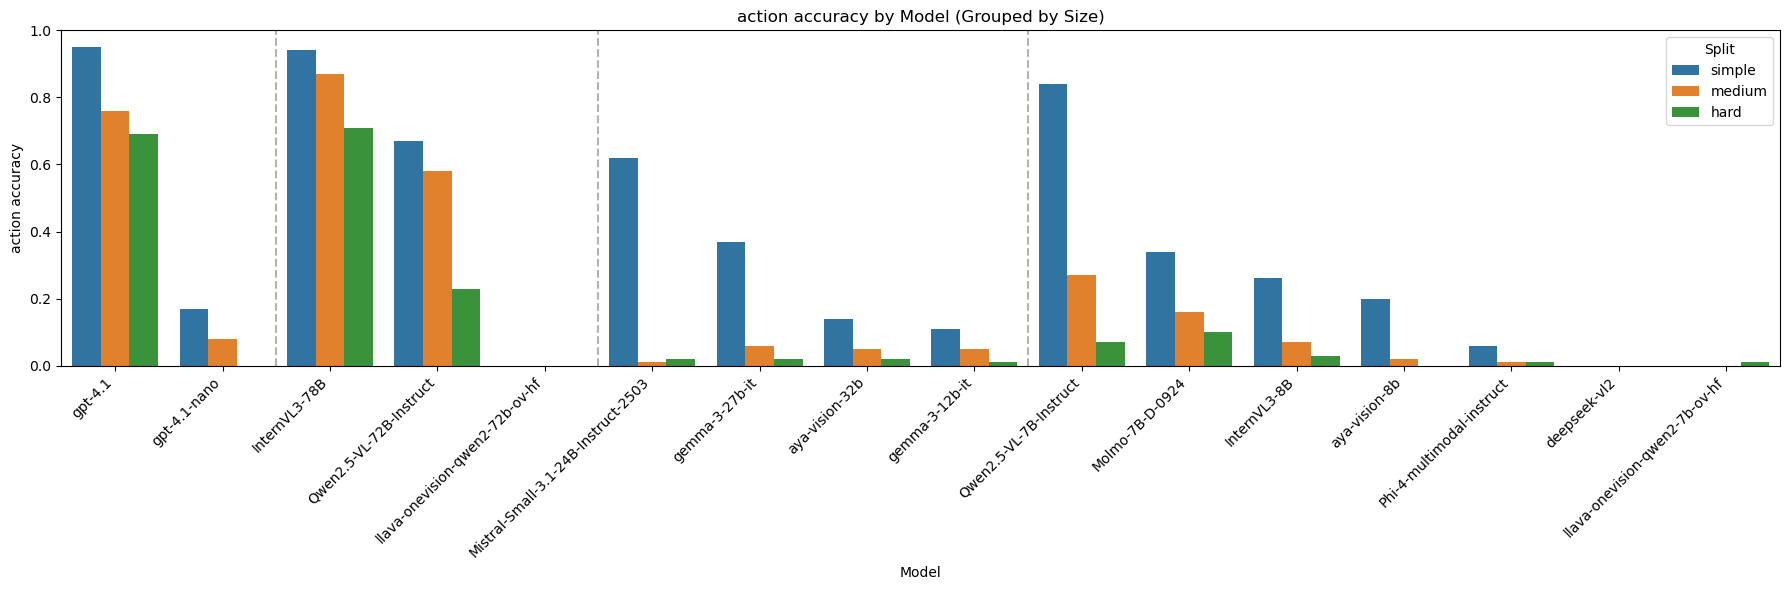

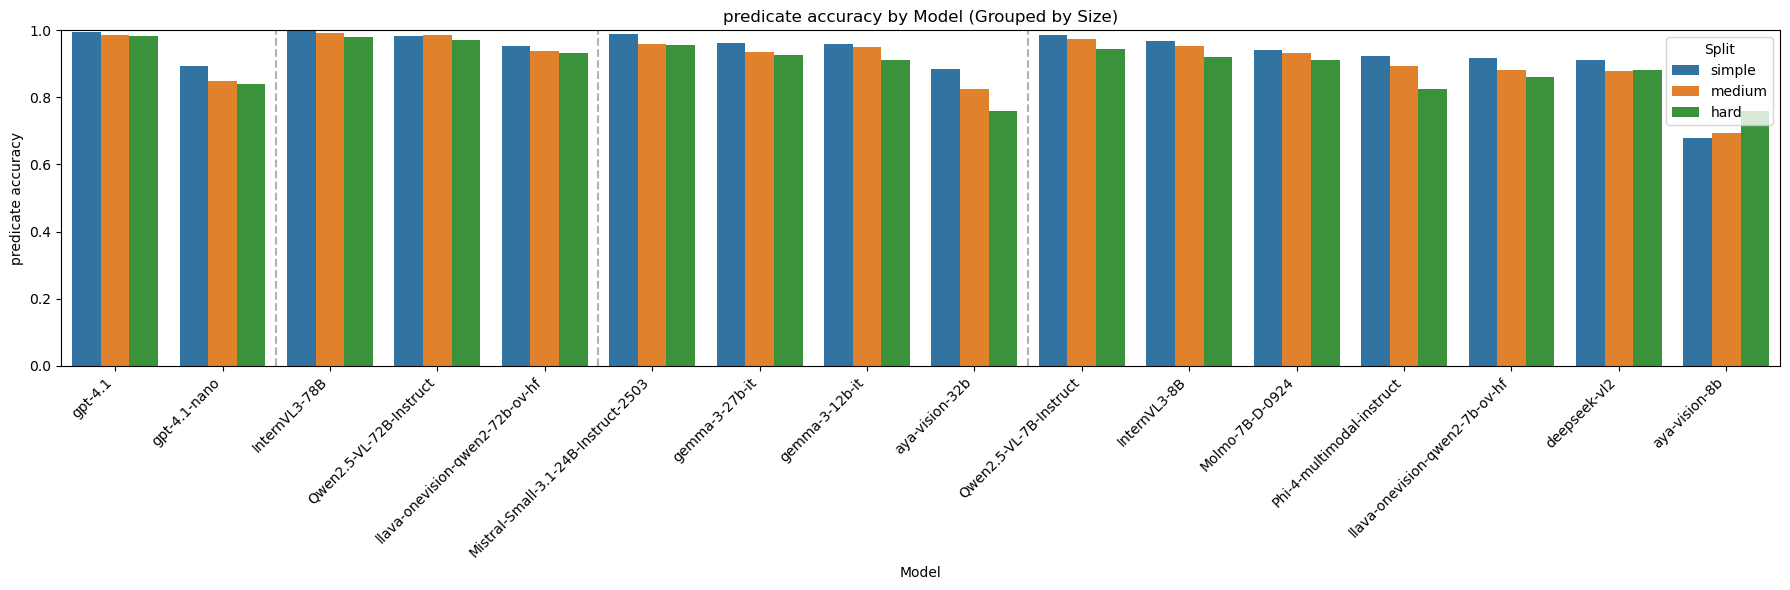

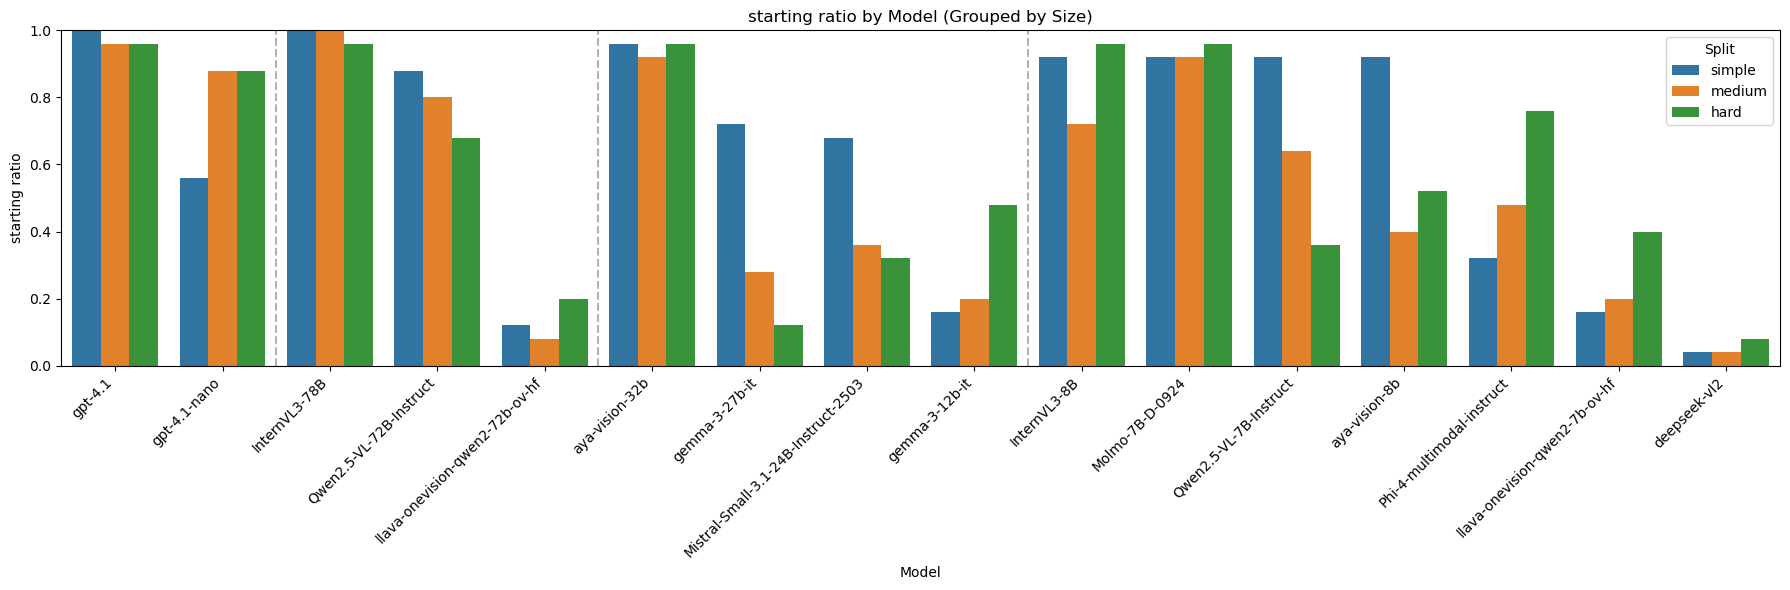

In [ ]:
# Giovanni version

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_task_accuracy_bar_with_dividers(main_table, vlm_models_by_size, key):
    size_priority = ['closed_models', 'large', 'medium', 'small']

    # Step 1: Map models to their size group
    size_map = {}
    for size in size_priority:
        for model in vlm_models_by_size.get(size, []):
            size_map[model] = size

    df = main_table.copy()
    df['model_size'] = df['model'].map(size_map)
    df = df.dropna(subset=['model_size'])

    # Step 2: Order models by size group and simple accuracy
    model_order = []
    group_boundaries = []
    idx = 0

    for size in size_priority:
        group_models = vlm_models_by_size.get(size, [])
        df_group = df[(df['model'].isin(group_models)) & (df['split'] == 'simple')]
        df_sorted = df_group.sort_values(key, ascending=False)
        sorted_models = df_sorted['model'].tolist()
        model_order.extend(sorted_models)
        idx += len(sorted_models)
        group_boundaries.append(idx)

    group_boundaries = group_boundaries[:-1]  # no divider after last group

    # Step 3: Set model as categorical for bar alignment
    df['model'] = pd.Categorical(df['model'], categories=model_order, ordered=True)

    # Step 4: Bar plot
    plt.figure(figsize=(18, 6))
    ax = sns.barplot(
        data=df,
        x='model',
        y=key,
        hue='split'
    )

    # Step 5: Add vertical dashed lines between groups
    for boundary in group_boundaries:
        ax.axvline(x=boundary - 0.5, linestyle='--', color='gray', alpha=0.6)

    plt.title(f"{key} by Model (Grouped by Size)")
    plt.ylim(0, 1)
    plt.xlabel('Model')
    plt.ylabel(key)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(title='Split')
    plt.show()

#key = "task accuracy"
plot_task_accuracy_bar_with_dividers(predicates_main_table, vlm_models_by_size, "task accuracy")
plot_task_accuracy_bar_with_dividers(predicates_main_table, vlm_models_by_size, "action accuracy")
plot_task_accuracy_bar_with_dividers(predicates_main_table, vlm_models_by_size, "predicate accuracy")
plot_task_accuracy_bar_with_dividers(predicates_main_table, vlm_models_by_size, "starting ratio")


### 🔍 Key Takeaways from Task Accuracy Evaluation
# ChatGPT comments
- **Closed-source models outperform all others.**  
  GPT-4.1 achieves perfect performance on simple tasks and remains robust even on medium and hard ones, clearly outperforming all open-source alternatives.

- **Model size matters — but isn't everything.**  
  Among open-source models, InternVL3-78B shows the strongest performance across all task levels. However, some other large models (e.g., Qwen2.5-VL-72B-Instruct) perform significantly worse, indicating that size alone is not a sufficient predictor of capability.

- **Medium-sized VLMs (12B–32B) struggle with generalization.**  
  Models like Mistral-Small-24B and Gemma-27B show reasonable accuracy on simple tasks, but fail to generalize to medium and hard settings. Their overall performance is far behind larger models.

- **Small models are only useful for the simplest tasks.**  
  While some 7B–8B models (e.g., Qwen2.5-VL-7B-Instruct, InternVL3-8B) show non-zero performance on the simple split, they fail almost entirely on harder tasks — highlighting their limitations in reasoning or multi-step comprehension.

- **Hard tasks remain unsolved by most models.**  
  Nearly all models — except GPT-4.1 and InternVL3-78B — achieve close to zero accuracy on the hardest tasks. This shows a substantial gap in current VLM robustness and suggests an important direction for future research.

# my comments
- **The task splits is justified**
  The tasks split into simple, medium and hard is justified for all models, there is no case where a model performs better in more difficult task.

- **Variability in simple task**
  The simple task shows some variability. Qwen2.5-VL-7B-Instruct is stronger than its 72B variant. This seems difficult to explain.

### 🔍 Key Takeaways from Action Accuracy Evaluation
- **GPT-4.1 is not perfect**
  Even if GPT-4.1 is perfect in task accuracy, it is not in action accuracy. The model fails 5% of the times in recognizing both -pre and -post conditions predicates. The perfect task accuracy score is due to the fact that the model is failing on the prediction of the post conditions of the final action of the plan. This means that the task is actually been completed but the model do not recognize perfectly the final state. (aligning to ViLa) 

### 🔍 Key Takeaways from Predicate Accuracy Evaluation
- **High Predicate Accuracy doea not mean high action or task accuracy**
  even if the predicate accuracy is high for virtually all the models we tested, this does not translate into very high action and task accuracies. The explanation is that every action is predicted correctly if all its pre and post conditions predicates are labeled correctly. For instance, if we assume that on average each action has about 7 predicates among pre and post conditions (i.e.GPT-4.1 case, simple setting), even with a 97% predicate accuracy the resulting action accuracy could be around 0.97^7 = 0.80, so 80%.

### 🔍 Key Takeaways from Starting Ratio Evaluation
- **Some models do not even start**
 Recognizing the initial state is not trivial for many models and this completly hinders their performanace since they can not even start the tasks. Note that the Starting Ration takes into consideration just if the starting state (as seen by the VLM) is a feasible starting point for a plan that reaches the goal, this means that it could still be the case that the model is not recognizing it completly correctly and the plan fails immediately after the initial actions since there is a discrepancy between the true symbolic representation of the environment and the model beliefs. Models like llava-onevision-qwen2-72b-ov-hf or deepseek-vl2 are not even able to get more than 20% SR leading to consistent task failures on every split.

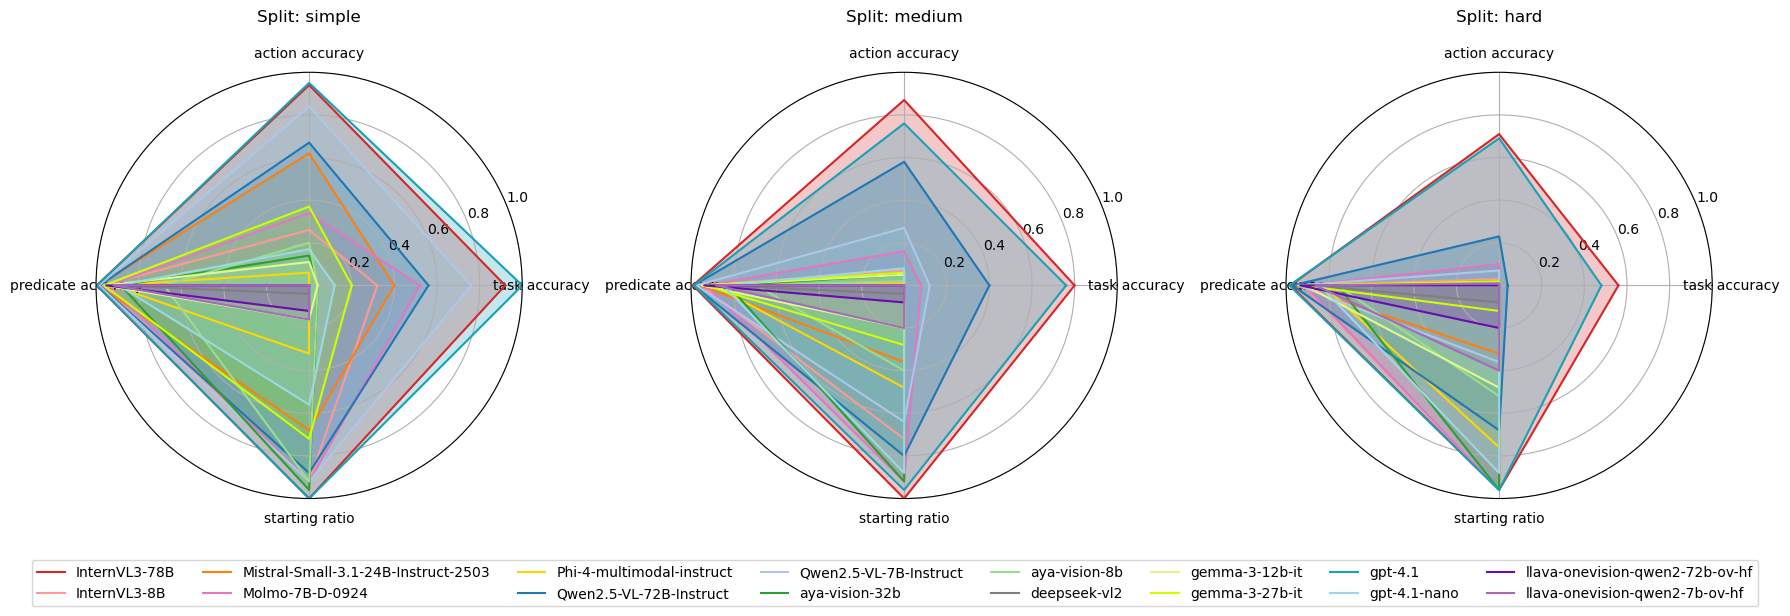

In [17]:
def plot_radar_main_table(main_table, metrics=['task accuracy', 'action accuracy', 'predicate accuracy', 'starting ratio']):
    fig, axes = plt.subplots(1, len(splits), figsize=(18, 6),
                             subplot_kw={'polar': True})

    for ax, split in zip(axes, splits):
        df_split = main_table[main_table['split'] == split]
        if df_split.empty:
            ax.set_visible(False)
            continue

        angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
        angles += angles[:1]  # close the circle

        for _, row in df_split.iterrows():
            model = row['model']
            values = [row[m] for m in metrics]
            values += values[:1]
            c = color_map.get(model, 'gray')
            ax.plot(angles, values, label=model, color=c)
            ax.fill(angles, values, color=c, alpha=0.25)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics)
        ax.set_ylim(0, 1)
        ax.set_title(f'Split: {split}', y=1.1)

    # get legend from first non-empty axis
    for ax in axes:
        handles, labels = ax.get_legend_handles_labels()
        if handles:
            break

    ncol = int(np.ceil(len(labels) / 2))
    fig.legend(handles, labels, loc='lower center', ncol=ncol,
               bbox_to_anchor=(0.5, -0.05))

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    return fig

fig = plot_radar_main_table(predicates_main_table)
# save_fig(fig, 'main_predicates_radar_no_cot')
fig.show()

In [18]:
predicates_main_table

,model,split,predicate accuracy,macro predicate accuracy,action accuracy,task accuracy,starting ratio
2,InternVL3-78B,simple,0.997,0.997,0.94,0.92,1.00
18,InternVL3-78B,medium,0.991,0.991,0.87,0.80,1.00
34,InternVL3-78B,hard,0.979,0.979,0.71,0.56,0.96
0,InternVL3-8B,simple,0.968,0.926,0.26,0.32,0.92
16,InternVL3-8B,medium,0.953,0.906,0.07,0.00,0.72
32,InternVL3-8B,hard,0.921,0.884,0.03,0.00,0.96
14,Mistral-Small-3.1-24B-Instruct-2503,simple,0.989,0.973,0.62,0.40,0.68
30,Mistral-Small-3.1-24B-Instruct-2503,medium,0.958,0.920,0.01,0.00,0.36
46,Mistral-Small-3.1-24B-Instruct-2503,hard,0.957,0.932,0.02,0.00,0.32
13,Molmo-7B-D-0924,simple,0.940,0.909,0.34,0.52,0.92


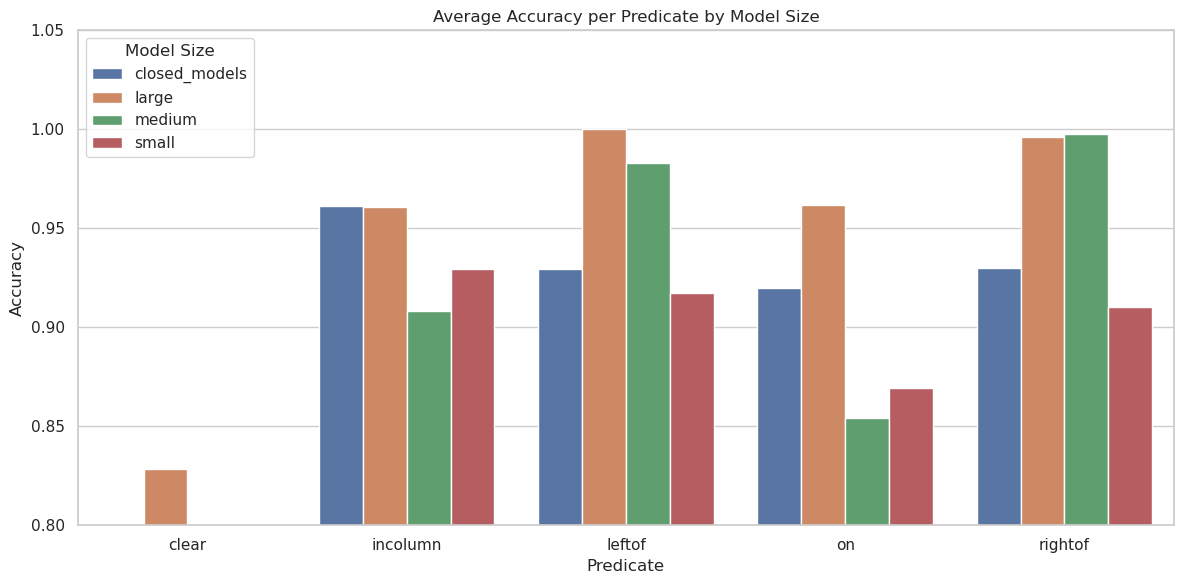

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot aesthetics
sns.set(style="whitegrid")

# Group by model_size and predicate, compute mean accuracy
grouped = predicates_table.groupby(['model_size', 'predicate'])[['accuracy']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='predicate', y='accuracy', hue='model_size')
plt.title("Average Accuracy per Predicate by Model Size")
plt.ylabel("Accuracy")
plt.xlabel("Predicate")
plt.ylim(0.8, 1.05)
plt.legend(title="Model Size")
plt.tight_layout()
plt.show()


In [20]:
def construct_predicates_table(results):
    rows = []
    for split in splits:
        for model, data in results.get(split, {}).items():
            # Safely round metrics, leaving NaN as is
            for predicate, pred_data in data.get('predicate_stats', {}).items():
                rows.append({
                    'model': model,
                    'split': split,
                    'predicate': predicate,
                    'accuracy': np.nan if pd.isna(pred_data.get('accuracy')) else round(pred_data.get('accuracy'), 3),
                    'yes_accuracy': np.nan if pd.isna(pred_data.get('yes_accuracy')) else round(pred_data.get('yes_accuracy'), 3),
                    'no_accuracy': np.nan if pd.isna(pred_data.get('no_accuracy')) else round(pred_data.get('no_accuracy'), 3),
                    
                })
    df = pd.DataFrame(rows)
    df['split'] = pd.Categorical(df['split'], categories=['simple', 'medium', 'hard'], ordered=True)
    df = df.sort_values(by=['model', 'split'])
    return df

predicates_table = construct_predicates_table(predicates_results)


In [21]:
predicates_table

,model,split,predicate,accuracy,yes_accuracy,no_accuracy
10,InternVL3-78B,simple,on,0.996,1.000,0.995
11,InternVL3-78B,simple,incolumn,0.990,1.000,0.987
12,InternVL3-78B,simple,clear,1.000,1.000,1.000
13,InternVL3-78B,simple,rightof,0.998,1.000,0.996
14,InternVL3-78B,simple,leftof,1.000,1.000,1.000
...,...,...,...,...,...,...
185,llava-onevision-qwen2-7b-ov-hf,hard,on,0.792,0.896,0.783
186,llava-onevision-qwen2-7b-ov-hf,hard,incolumn,0.939,0.951,0.935
187,llava-onevision-qwen2-7b-ov-hf,hard,clear,0.520,0.722,0.292
188,llava-onevision-qwen2-7b-ov-hf,hard,rightof,0.934,1.000,0.894


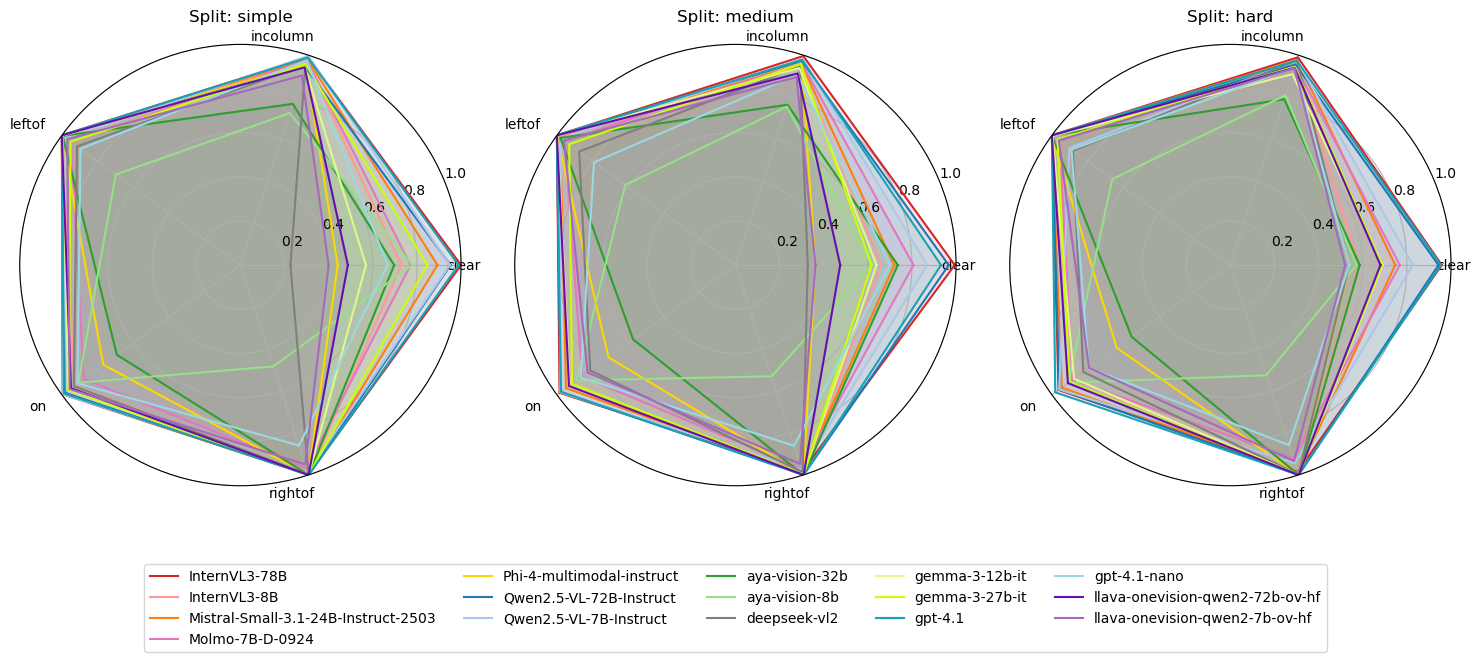

In [22]:
def plot_predicate_accuracy_radar(predicates_table, splits):
    predicates = sorted(predicates_table['predicate'].unique())
    angles = np.linspace(0, 2 * np.pi, len(predicates), endpoint=False).tolist()
    angles += angles[:1]

    fig, axes = plt.subplots(1, len(splits), figsize=(5 * len(splits), 5),
                             subplot_kw={'polar': True})
    if len(splits) == 1:
        axes = [axes]

    for ax, split in zip(axes, splits):
        df_split = predicates_table[predicates_table['split'] == split]
        if df_split.empty:
            ax.set_visible(False)
            continue

        pivot = df_split.pivot(index='model', columns='predicate', values='accuracy')
        for model in pivot.index:
            vals = pivot.loc[model, predicates].fillna(0).tolist()
            vals += vals[:1]
            c = color_map.get(model, 'gray')
            ax.plot(angles, vals, label=model, color=c)
            ax.fill(angles, vals, color=c, alpha=0.1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(predicates, rotation=45, ha='right')
        ax.set_ylim(0, 1)
        ax.set_title(f"Split: {split}")

    # deduplicate legend entries
    handles, labels = axes[0].get_legend_handles_labels()
    unique = {}
    for h, l in zip(handles, labels):
        if l not in unique:
            unique[l] = h

    fig.legend(unique.values(), unique.keys(),
               loc='upper center', ncol=5, bbox_to_anchor=(0.5, -0.1))
    plt.tight_layout()
    plt.show()

plot_predicate_accuracy_radar(predicates_table, splits)

In [23]:
# Create a reverse lookup from model to size
model_to_size = {model: size for size, models in vlm_models_by_size.items() for model in models}

# Add a new column for model size
predicates_table["model_size"] = predicates_table["model"].map(model_to_size).fillna("unknown")

# Group by model size and compute mean accuracies
agg_by_size = predicates_table.groupby("model_size")[["accuracy", "yes_accuracy", "no_accuracy"]].mean().reset_index()

# Group by split and model size to understand split-level trends
agg_by_split_size = predicates_table.groupby(["split", "model_size"])[["accuracy"]].mean().reset_index()

# Group by predicate to find easiest/hardest predicates
agg_by_predicate = predicates_table.groupby("predicate")[["accuracy"]].mean().reset_index().sort_values("accuracy")

/tmp/ipykernel_3804980/978203473.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_by_split_size = predicates_table.groupby(["split", "model_size"])[["accuracy"]].mean().reset_index()


In [27]:
predicates_table.to_csv("predicate_table.csv")

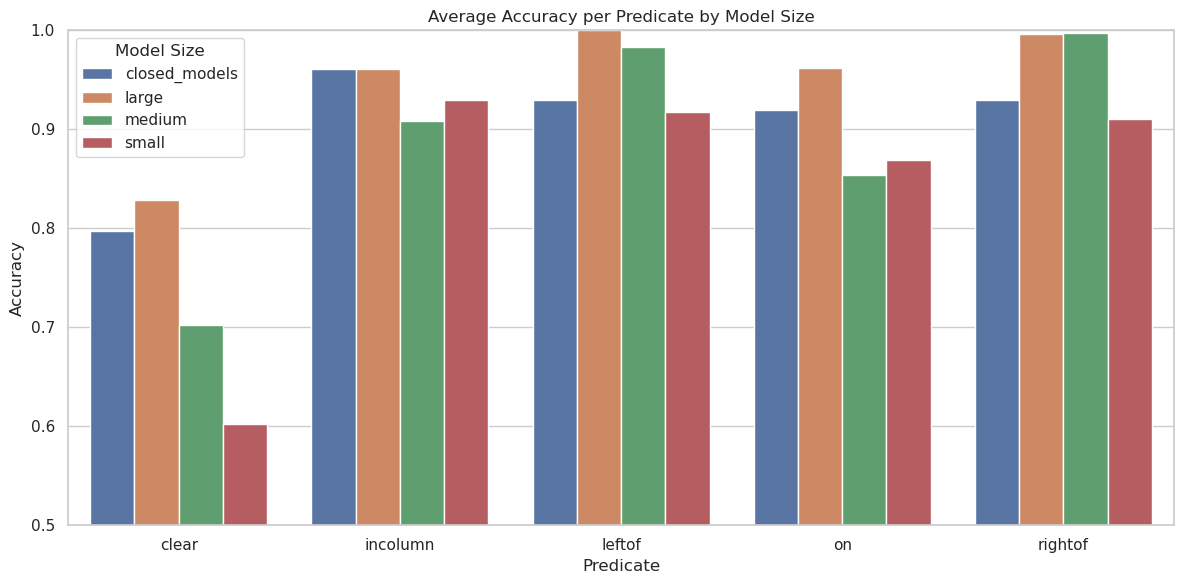

,model_size,predicate,accuracy
0,closed_models,clear,0.797000
1,closed_models,incolumn,0.961167
2,closed_models,leftof,0.929667
3,closed_models,on,0.919667
4,closed_models,rightof,0.929833
5,large,clear,0.828444
6,large,incolumn,0.960667
7,large,leftof,1.000000
8,large,on,0.961778
9,large,rightof,0.996333


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot aesthetics
sns.set(style="whitegrid")

# Group by model_size and predicate, compute mean accuracy
grouped = predicates_table.groupby(['model_size', 'predicate'])[['accuracy']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='predicate', y='accuracy', hue='model_size')
plt.title("Average Accuracy per Predicate by Model Size")
plt.ylabel("Accuracy")
plt.xlabel("Predicate")
plt.ylim(0.5, 1.00)
plt.legend(title="Model Size")
plt.tight_layout()
plt.show()

grouped

✅ Key Takeaways on Average Accuracy per Predicate by Model Size:
1. The large models are in par or outperform all the other classes, notably also the Open AI ones
2. The leftof and rightof predicates are the easier to predict correctly, probably because they only require the models to perform simple spatial inference, whereas clear, incolumn and on are slighly more ambiguous. 
3. The clear predicate is the hardest

In [21]:
agg_by_size

,model_size,accuracy,yes_accuracy,no_accuracy
0,closed_models,0.907467,0.933433,0.844700
1,large,0.949444,0.940400,0.973489
2,medium,0.889100,0.915500,0.882550
3,small,0.845638,0.896276,0.803448


✅ Key Takeaways:
1. Large models perform best overall
With ~95% accuracy, large models clearly outperform all others.

They also show strong "no" accuracy (0.973), suggesting they are especially good at identifying when a predicate is false (which is crucial for planning tasks like Blocksworld).

2. Closed models vs Medium models
Despite being closed-source, closed_models perform worse than large open models (0.907 vs 0.949), but better than medium and small ones.

They also have a slightly lower no-accuracy (0.845) compared to mediums (0.883), which might indicate a slight bias toward predicting predicates as true.

3. Small models struggle most
Their overall accuracy is lowest (0.846).

The gap between yes_accuracy (0.896) and no_accuracy (0.803) suggests they may have difficulty rejecting false predicates — potentially hallucinating relationships that don’t exist.



In [22]:
agg_by_split_size

,split,model_size,accuracy
0,simple,closed_models,0.927700
1,simple,large,0.949600
2,simple,medium,0.910450
3,simple,small,0.858486
4,medium,closed_models,0.901500
5,medium,large,0.946467
6,medium,medium,0.878700
7,medium,small,0.836229
8,hard,closed_models,0.893200
9,hard,large,0.952267


✅ Key Observations:
1. Large models maintain high accuracy even on hard tasks
Their accuracy stays consistently around 95%, showing impressive robustness as task complexity increases.

In fact, they perform best on the hard split (0.952), suggesting they can leverage their capacity for complex spatial reasoning under challenge.

2. Closed models decline gradually
Accuracy drops from 0.928 → 0.902 → 0.893 (simple → medium → hard).

This shows a smooth performance degradation, indicating some generalization, but not as strong as large open models.

3. Medium models are more sensitive to difficulty
Their performance drops from 0.910 → 0.879 → 0.878, indicating a sharper loss from simple to medium.

Medium models seem to plateau under pressure, especially between medium and hard splits.

4. Small models are unstable
Their accuracy increases slightly on hard (0.842) compared to medium (0.836) — possibly due to variance in sample difficulty or overfitting patterns.

Overall, small models are not reliable across splits.

| Insight                                     | Explanation                                                                                                  |
| ------------------------------------------- | ------------------------------------------------------------------------------------------------------------ |
| 🧠 **Scale helps**                          | Large models consistently outperform others — especially under complex conditions.                           |
| ❗ **“No” prediction is harder**             | Small/medium models show lower `no_accuracy`, indicating they struggle with **false predicate recognition**. |
| 📉 **Smaller models degrade quickly**       | They lose accuracy sharply from simple to medium.                                                            |
| 🔒 **Closed models are decent but not top** | They are good, but **don’t beat the best open models**, particularly large ones like InternVL3-78B.          |


In [23]:
agg_by_predicate

,predicate,accuracy
0,clear,0.694083
3,on,0.889104
1,incolumn,0.933875
4,rightof,0.950667
2,leftof,0.950750


| Predicate  | Mean Acc  | Small Models | Medium Models | Large Models | Closed Models | Max Drop  |
| ---------- | --------- | ------------ | ------------- | ------------ | ------------- | --------- |
| `clear`    | **69.4%** | **60.2%**    | 70.2%         | **82.8%**    | 79.7%         | **22.6%** |
| `on`       | 88.9%     | 86.9%        | 85.4%         | 96.2%        | 91.9%         | 10.6%     |
| `incolumn` | 93.4%     | 92.9%        | 90.8%         | 96.1%        | 96.1%         | 5.3%      |
| `rightof`  | 95.1%     | 91.0%        | 99.8%         | 99.6%        | 92.9%         | 8.8%      |
| `leftof`   | 95.1%     | 91.7%        | 98.3%         | **100%**     | 92.9%         | 8.3%      |


In [ ]:
predicates_table.to_csv("predicate_table.csv")

=== Average Accuracy per Predicate ===
  predicate  accuracy  yes_accuracy  no_accuracy
0     clear  0.694083      0.749333     0.608708
1  incolumn  0.933875      0.955750     0.927208
2    leftof  0.950750      0.961833     0.943562
3        on  0.889104      0.929375     0.885771
4   rightof  0.950667      0.973708     0.936062


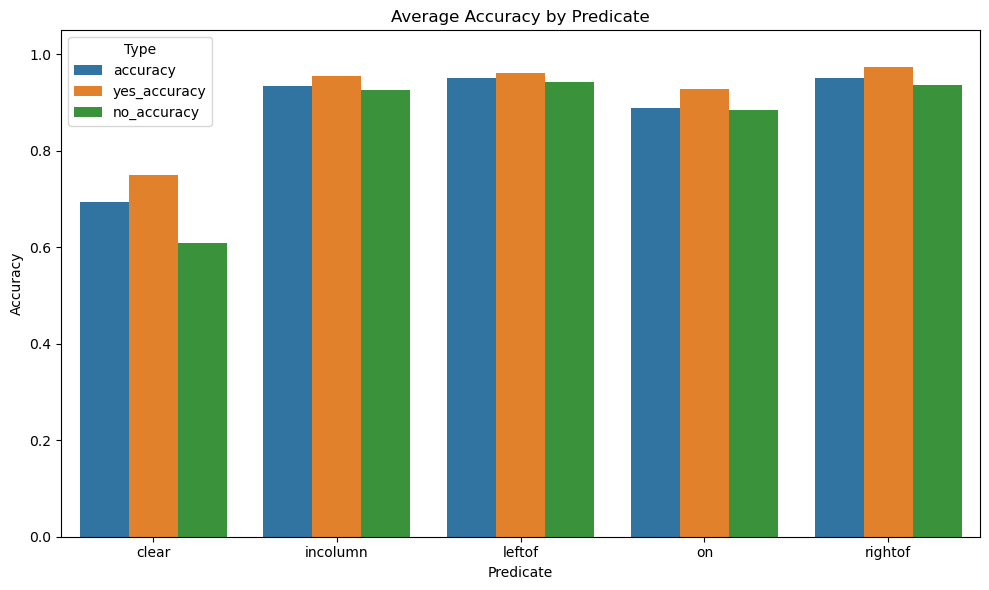

=== Predicate performance across splits ===

/tmp/ipykernel_3118716/1857170210.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  split_predicate_means = predicates_table.groupby(["split", "predicate"])[["accuracy"]].mean().reset_index()



     split predicate  accuracy
0   simple     clear  0.712375
1   simple  incolumn  0.936063
2   simple    leftof  0.959375
3   simple        on  0.925312
4   simple   rightof  0.952937
5   medium     clear  0.674250
6   medium  incolumn  0.928438
7   medium    leftof  0.941750
8   medium        on  0.881812
9   medium   rightof  0.952125
10    hard     clear  0.695625
11    hard  incolumn  0.937125
12    hard    leftof  0.951125
13    hard        on  0.860187
14    hard   rightof  0.946937


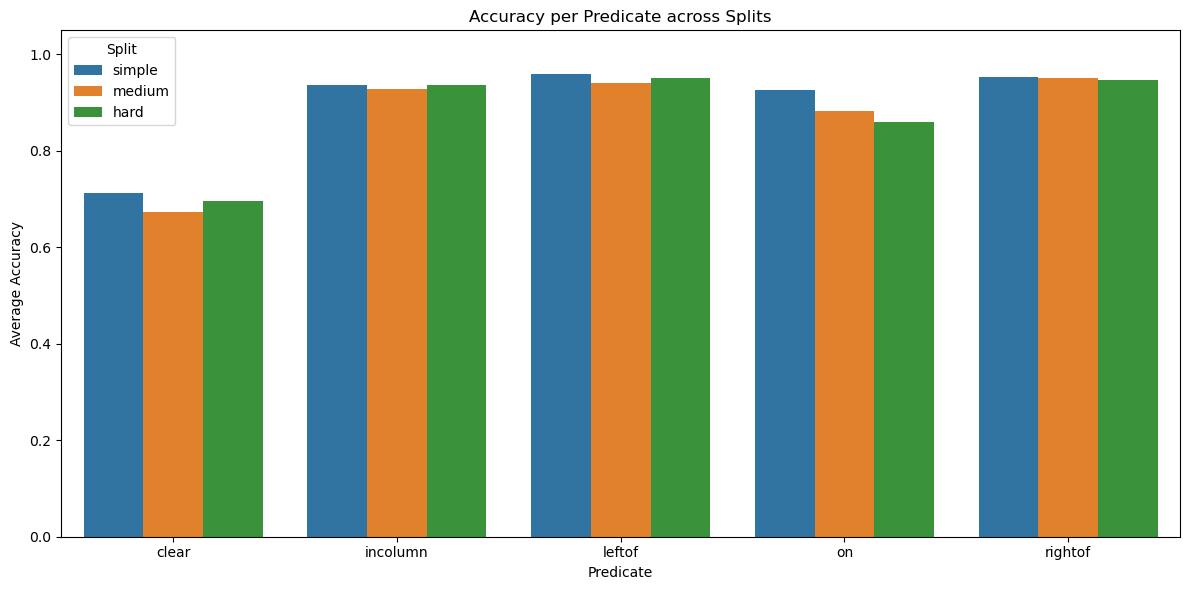

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_predicate_trends(predicates_table: pd.DataFrame):
    """
    Analyze and visualize predicate-specific trends in VLM performance on the Blocksworld task.

    Parameters:
    - predicates_table (pd.DataFrame): DataFrame with columns ['model', 'split', 'predicate', 'accuracy', 'yes_accuracy', 'no_accuracy']
    """

    # Step 1: Average accuracy per predicate
    predicate_means = predicates_table.groupby("predicate")[["accuracy", "yes_accuracy", "no_accuracy"]].mean().reset_index()

    print("=== Average Accuracy per Predicate ===")
    print(predicate_means)

    # Step 2: Plot overall predicate performance
    plt.figure(figsize=(10, 6))
    predicate_plot = pd.melt(predicate_means, id_vars="predicate",
                             value_vars=["accuracy", "yes_accuracy", "no_accuracy"],
                             var_name="Accuracy Type", value_name="Score")
    sns.barplot(data=predicate_plot, x="predicate", y="Score", hue="Accuracy Type")

    plt.title("Average Accuracy by Predicate")
    plt.ylim(0.0, 1.05)
    plt.ylabel("Accuracy")
    plt.xlabel("Predicate")
    plt.legend(title="Type")
    plt.tight_layout()
    plt.show()

    # Step 3 (Optional): Predicate performance across splits
    split_predicate_means = predicates_table.groupby(["split", "predicate"])[["accuracy"]].mean().reset_index()
    print("=== Predicate performance across splits ===")
    print(split_predicate_means)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=split_predicate_means, x="predicate", y="accuracy", hue="split")

    plt.title("Accuracy per Predicate across Splits")
    plt.ylim(0.0, 1.05)
    plt.ylabel("Average Accuracy")
    plt.xlabel("Predicate")
    plt.legend(title="Split")
    plt.tight_layout()
    plt.show()

    return 
analyze_predicate_trends(predicates_table)

📌 Key Observations for Predicates

1. "clear" is the most challenging and scales the most
With an average accuracy of just ~69%, it's consistently the worst-performing.

Small models struggle significantly at ~60%, while large models gain ~23 percentage points—a major leap.

This aligns with our interpretation: "clear" is an action-relevant predicate and requires reasoning over occlusion and vertical stacks.

Its high variance (std ≈ 20%) shows that model capacity matters a lot for this type of reasoning.

2. "on" is moderately difficult and moderately scalable
Accuracy ranges from ~85–96%, showing a 10% scale benefit from small to large models.

Models must detect support relationships, which can involve depth cues, but is less abstract than "clear".

3. "leftof", "rightof", "incolumn" are reliably easy
Even small models do well, often above 90%.

Incolumn especially shows a small gain from small (92.9%) to large (96.1%)—just a 3.2% improvement.

These predicates benefit from direct geometric cues, and don’t demand hierarchical reasoning.



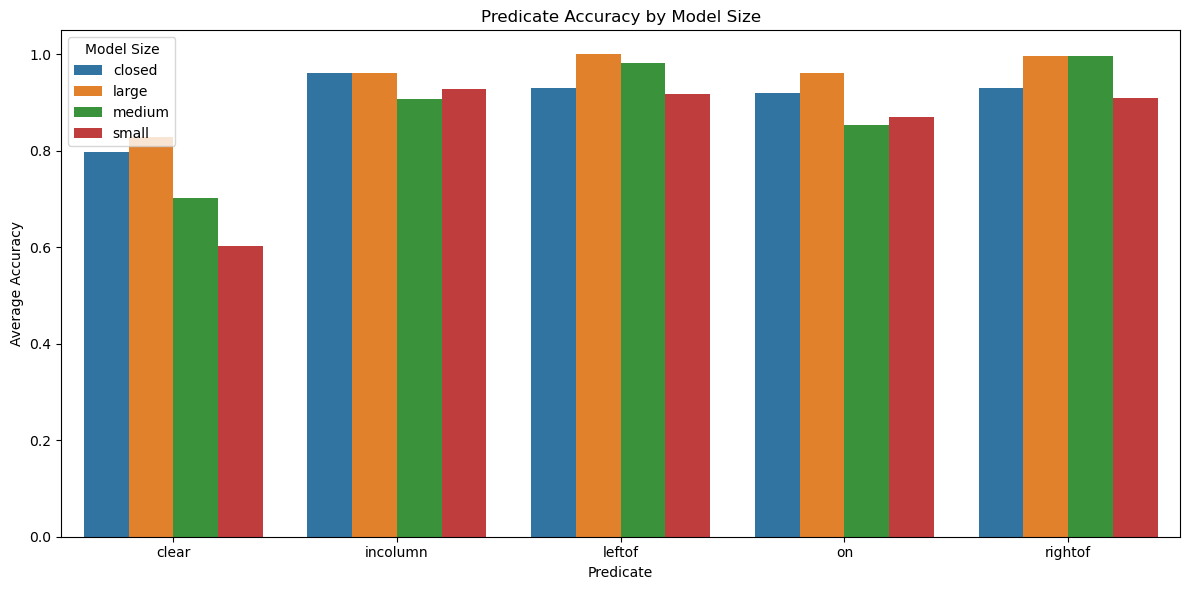

=== Average Accuracy per Predicate by Model Size ===
model_size  closed  large  medium  small
predicate                               
clear        0.797  0.828   0.702  0.602
incolumn     0.961  0.961   0.908  0.929
leftof       0.930  1.000   0.983  0.917
on           0.920  0.962   0.854  0.869
rightof      0.930  0.996   0.998  0.910


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_predicate_by_model_size(predicates_table: pd.DataFrame):
    """
    Analyze how model size impacts predicate performance in the Blocksworld task.

    Parameters:
    - predicates_table (pd.DataFrame): DataFrame with columns ['model', 'split', 'predicate', 'accuracy']
    """

    # Define your model size dictionary
    vlm_models_by_size = {
        "small": [
            "deepseek-vl2", "Phi-4-multimodal-instruct", "Molmo-7B-D-0924",
            "llava-onevision-qwen2-7b-ov-hf", "Qwen2.5-VL-7B-Instruct", 
            "aya-vision-8b", "InternVL3-8B"
        ],
        "medium": [
            "gemma-3-12b-it", "Mistral-Small-3.1-24B-Instruct-2503",
            "gemma-3-27b-it", "aya-vision-32b"
        ],
        "large": [
            "llava-onevision-qwen2-72b-ov-hf", "Qwen2.5-VL-72B-Instruct",
            "InternVL3-78B"
        ],
        "closed": [
            "gpt-4.1", "gpt-4.1-nano"
        ]
    }

    # Reverse mapping: model -> size
    model_to_size = {
        model: size for size, models in vlm_models_by_size.items() for model in models
    }

    # Map model size into the dataframe
    predicates_table["model_size"] = predicates_table["model"].map(model_to_size)

    # Drop rows with unknown model size (just in case)
    filtered = predicates_table.dropna(subset=["model_size"])

    # Group by predicate and model size
    grouped = filtered.groupby(["model_size", "predicate"])["accuracy"].mean().reset_index()

    # Plot the result
    plt.figure(figsize=(12, 6))
    sns.barplot(data=grouped, x="predicate", y="accuracy", hue="model_size")
    plt.title("Predicate Accuracy by Model Size")
    plt.ylim(0, 1.05)
    plt.ylabel("Average Accuracy")
    plt.xlabel("Predicate")
    plt.legend(title="Model Size")
    plt.tight_layout()
    plt.show()

    # Optional: Print table for reference
    print("=== Average Accuracy per Predicate by Model Size ===")
    print(grouped.pivot(index="predicate", columns="model_size", values="accuracy").round(3))

analyze_predicate_by_model_size(predicates_table)

✅ Key Takeaways by Predicate:
🧱 clear — the hardest predicate overall:
Even large models peak at just 82.8%, indicating this task remains non-trivial even for top-tier models.

Small models are especially poor (60%), reinforcing that absence-based reasoning is difficult for less capable architectures.

Interpretation: “clear” may require understanding empty space, occlusion, and 3D structure, all of which are challenging to parse from static 2D inputs.

🔁 incolumn — consistently high:
All model sizes perform well (≥0.908), with large and closed models tied at 0.961.

This shows vertical alignment is reliably detected across scales.

↔️ leftof / rightof — easiest spatial relations:
leftof reaches 1.000 with large models, very close for medium (0.983) and closed (0.930).

rightof has even medium models at 0.998, slightly better than large (0.996) and closed (0.930).

Interpretation: Horizontal layout is easy to learn and generalize, even for smaller models.

🧍 on — moderate, but size-sensitive:
Large models do very well (0.962), closed just behind (0.920), but medium and small drop significantly.

This suggests that support relationships require higher capacity — it's not just about stacking but relative depth and alignment.

🔍 Summary: Which Size Handles Which Predicate Best?
Predicate	Best Size	Gap (Best vs Small)	Notes
clear	Large	+22.6%	Most challenging, large models barely OK
incolumn	Large/Closed	+3.2%	Easy and consistent
leftof	Large	+8.3%	Spatially easy, well understood
rightof	Medium	+8.8%	Medium surprisingly top
on	Large	+9.3%	Depth-based, harder for small/medium


In [ ]:
def plot_predicate_yes_no_accuracy_radar(predicates_table, splits):
    """
    Plot a 2×3 grid of radar charts for yes_accuracy and no_accuracy
    for each split.
    """
    predicates = sorted(predicates_table['predicate'].unique())
    angles = np.linspace(0, 2 * np.pi, len(predicates), endpoint=False).tolist()
    angles += angles[:1]

    metrics = ['yes_accuracy', 'no_accuracy']
    titles = ['Yes Accuracy', 'No Accuracy']

    fig, axes = plt.subplots(
        2, len(splits),
        figsize=(5 * len(splits), 10),
        subplot_kw={'polar': True}
    )
    # Ensure axes is 2×n
    axes = axes.reshape(2, len(splits))

    for i, metric in enumerate(metrics):
        for j, split in enumerate(splits):
            ax = axes[i, j]
            df_split = predicates_table[predicates_table['split'] == split]
            if df_split.empty:
                ax.set_visible(False)
                continue

            pivot = df_split.pivot(
                index='model',
                columns='predicate',
                values=metric
            )
            for model in pivot.index:
                vals = pivot.loc[model, predicates].fillna(0).tolist()
                vals += vals[:1]
                ax.plot(angles, vals, label=model)
                ax.fill(angles, vals, alpha=0.1)

            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(predicates, rotation=45, ha='right')
            ax.set_ylim(0, 1)
            ax.set_title(f"{titles[i]} — Split: {split}", y=1.1)

    # build a single legend
    for ax in axes.flatten():
        handles, labels = ax.get_legend_handles_labels()
        if labels:
            break
    unique = dict(zip(labels, handles))
    fig.legend(
        unique.values(), unique.keys(),
        loc='upper center',
        ncol=int(np.ceil(len(labels) / 3)),
        bbox_to_anchor=(0.5, -0.05)
    )

    plt.tight_layout()
    plt.show()

plot_predicate_yes_no_accuracy_radar(predicates_table, splits)

6. Results

In this section, we present a comprehensive evaluation of various Vision-Language Models (VLMs) on the Blocksworld benchmark. The benchmark tasks require assessing the truth of symbolic predicates in visual scenes that depict block configurations, with varying complexity split into simple, medium, and hard categories.

⚙️ Task Accuracy Evaluation

Closed-source models outperform all others.
GPT-4.1 achieves perfect task accuracy on the simple split and maintains strong performance on medium and hard ones, outperforming all open-source models by a wide margin.

Model size matters — but isn't everything.
Among open models, InternVL3-78B consistently ranks highest across all task complexities. However, some other large models (e.g., Qwen2.5-VL-72B-Instruct) fall short, suggesting that sheer size does not guarantee robust understanding.

Medium-sized VLMs (12B–32B) struggle with generalization.
Models such as Mistral-Small-24B and Gemma-27B achieve reasonable accuracy on the simple split but degrade rapidly on medium and hard tasks. This reflects limited generalization capacity.

Small models are only useful for the simplest tasks.
Models like Qwen2.5-VL-7B-Instruct and InternVL3-8B show acceptable performance on simple tasks but fail almost entirely in harder settings, exposing limitations in spatial reasoning and compositional understanding.

Hard tasks remain mostly unsolved.
With the exception of GPT-4.1 and InternVL3-78B, most models perform near random on the hard split. This underscores the substantial challenge posed by deeper multi-step reasoning and the limitations of current VLMs.

Task split validity confirmed.
The distinction between simple, medium, and hard tasks is empirically justified: no model shows better performance on a harder task compared to an easier one.

Unexpected variability in simple split.
Some small models (e.g., Qwen2.5-VL-7B-Instruct) outperform their larger counterparts (e.g., Qwen2.5-VL-72B-Instruct) on simple tasks. This anomaly highlights architectural or training differences that go beyond size.

🔍 Predicate Accuracy Evaluation

Spatial predicates are not equally difficult.
Models handle spatial predicates like leftof, rightof, and incolumn with high accuracy (> 93%). In contrast, on (88.9%) and especially clear (69.4%) are more challenging. The clear predicate requires understanding of absence (i.e., no block on top), which is more abstract and error-prone.

Size influences predicate accuracy.
Larger models significantly outperform smaller ones on challenging predicates like clear (large: 82.8%, small: 60.2%). Even on easier predicates like rightof, small models trail by nearly 9%.

High predicate accuracy does not guarantee high task or action accuracy.
Since each action depends on multiple predicates (on average ~7), even a 97% predicate accuracy compounds to only ~80% action accuracy (e.g., 0.97^7). Thus, task performance drops sharply when predicate predictions are slightly noisy.

🔍 Action Accuracy Evaluation

GPT-4.1 is not perfect in actions.
Despite perfect task accuracy, GPT-4.1 has a ~5% error rate in predicate-based action assessment, particularly in recognizing postconditions of the final action. This suggests a disconnect between its state tracking and symbolic predicate grounding.

🔍 Starting State Recognition (Starting Ratio)

Some models fail to even start.
Models like llava-onevision-qwen2-72b-ov-hf and deepseek-vl2 achieve <20% Starting Ratio, meaning they frequently misinterpret the initial configuration and are unable to produce any viable plan. This bottleneck indicates that robust symbolic grounding at the outset is a key failure mode.

📊 Summary of Model Size Effects (ADD TABLE WITH Model Size Accuracy, Yes Accuracy, No Accuracy)


This shows a clear trend: larger models offer more robust understanding across both affirmative and negative predicate conditions. However, even top models exhibit meaningful gaps on key predicates like clear, and performance on the hardest tasks remains well below perfect.

Collectively, these results paint a nuanced picture: progress is evident, but robust symbolic reasoning in VLMs remains far from solved.

## Predicates w/CoT

In [24]:
experiment_folder_cot = os.path.join(ROOT, 'results', 'planning', 'blocksworld', 'run_27_04_25_cot')
assert os.path.exists(experiment_folder), f"Experiment folder {experiment_folder} does not exist"

predicates_folder_cot = os.path.join(experiment_folder_cot, 'predicates')
predicates_results_cot = load_results(predicates_folder_cot)

Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/InternVL3-8B
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/gpt-4.1
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/InternVL3-78B
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/gemma-3-12b-it
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/gemma-3-27b-it
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/llava-onevision-qwen2-7b-ov-hf
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/r

In [25]:
list_models(predicates_results_cot)

All expected models are present in simple
All expected models are present in medium
All expected models are present in hard


{'simple': {'InternVL3-78B',
  'InternVL3-8B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Molmo-7B-D-0924',
  'Phi-4-multimodal-instruct',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-vision-32b',
  'aya-vision-8b',
  'deepseek-vl2',
  'gemma-3-12b-it',
  'gemma-3-27b-it',
  'gpt-4.1',
  'gpt-4.1-nano',
  'llava-onevision-qwen2-72b-ov-hf',
  'llava-onevision-qwen2-7b-ov-hf'},
 'medium': {'InternVL3-78B',
  'InternVL3-8B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Molmo-7B-D-0924',
  'Phi-4-multimodal-instruct',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-vision-32b',
  'aya-vision-8b',
  'deepseek-vl2',
  'gemma-3-12b-it',
  'gemma-3-27b-it',
  'gpt-4.1',
  'gpt-4.1-nano',
  'llava-onevision-qwen2-72b-ov-hf',
  'llava-onevision-qwen2-7b-ov-hf'},
 'hard': {'InternVL3-78B',
  'InternVL3-8B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Molmo-7B-D-0924',
  'Phi-4-multimodal-instruct',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-

In [ ]:
main_table_predicates_cot = construct_main_table(predicates_results_cot)
main_table_predicates_cot.to_csv("main_table_predicates_cot.csv")

,model,split,predicate accuracy,macro predicate accuracy,action accuracy,task accuracy,starting ratio
2,InternVL3-78B,simple,0.996,0.993,0.95,0.96,1.00
18,InternVL3-78B,medium,0.991,0.992,0.87,0.80,0.96
34,InternVL3-78B,hard,0.976,0.984,0.72,0.56,0.96
0,InternVL3-8B,simple,0.950,0.910,0.21,0.08,0.56
16,InternVL3-8B,medium,0.922,0.891,0.03,0.00,0.44
32,InternVL3-8B,hard,0.858,0.854,0.03,0.00,0.60
14,Mistral-Small-3.1-24B-Instruct-2503,simple,0.980,0.973,0.64,0.56,0.84
30,Mistral-Small-3.1-24B-Instruct-2503,medium,0.954,0.945,0.19,0.04,0.52
46,Mistral-Small-3.1-24B-Instruct-2503,hard,0.938,0.943,0.06,0.00,0.48
13,Molmo-7B-D-0924,simple,0.767,0.705,0.00,0.00,0.00


/tmp/ipykernel_3632756/836794087.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/836794087.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_3632756/836794087.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/836794087.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_3632756/836794087.py:13: FutureWarnin

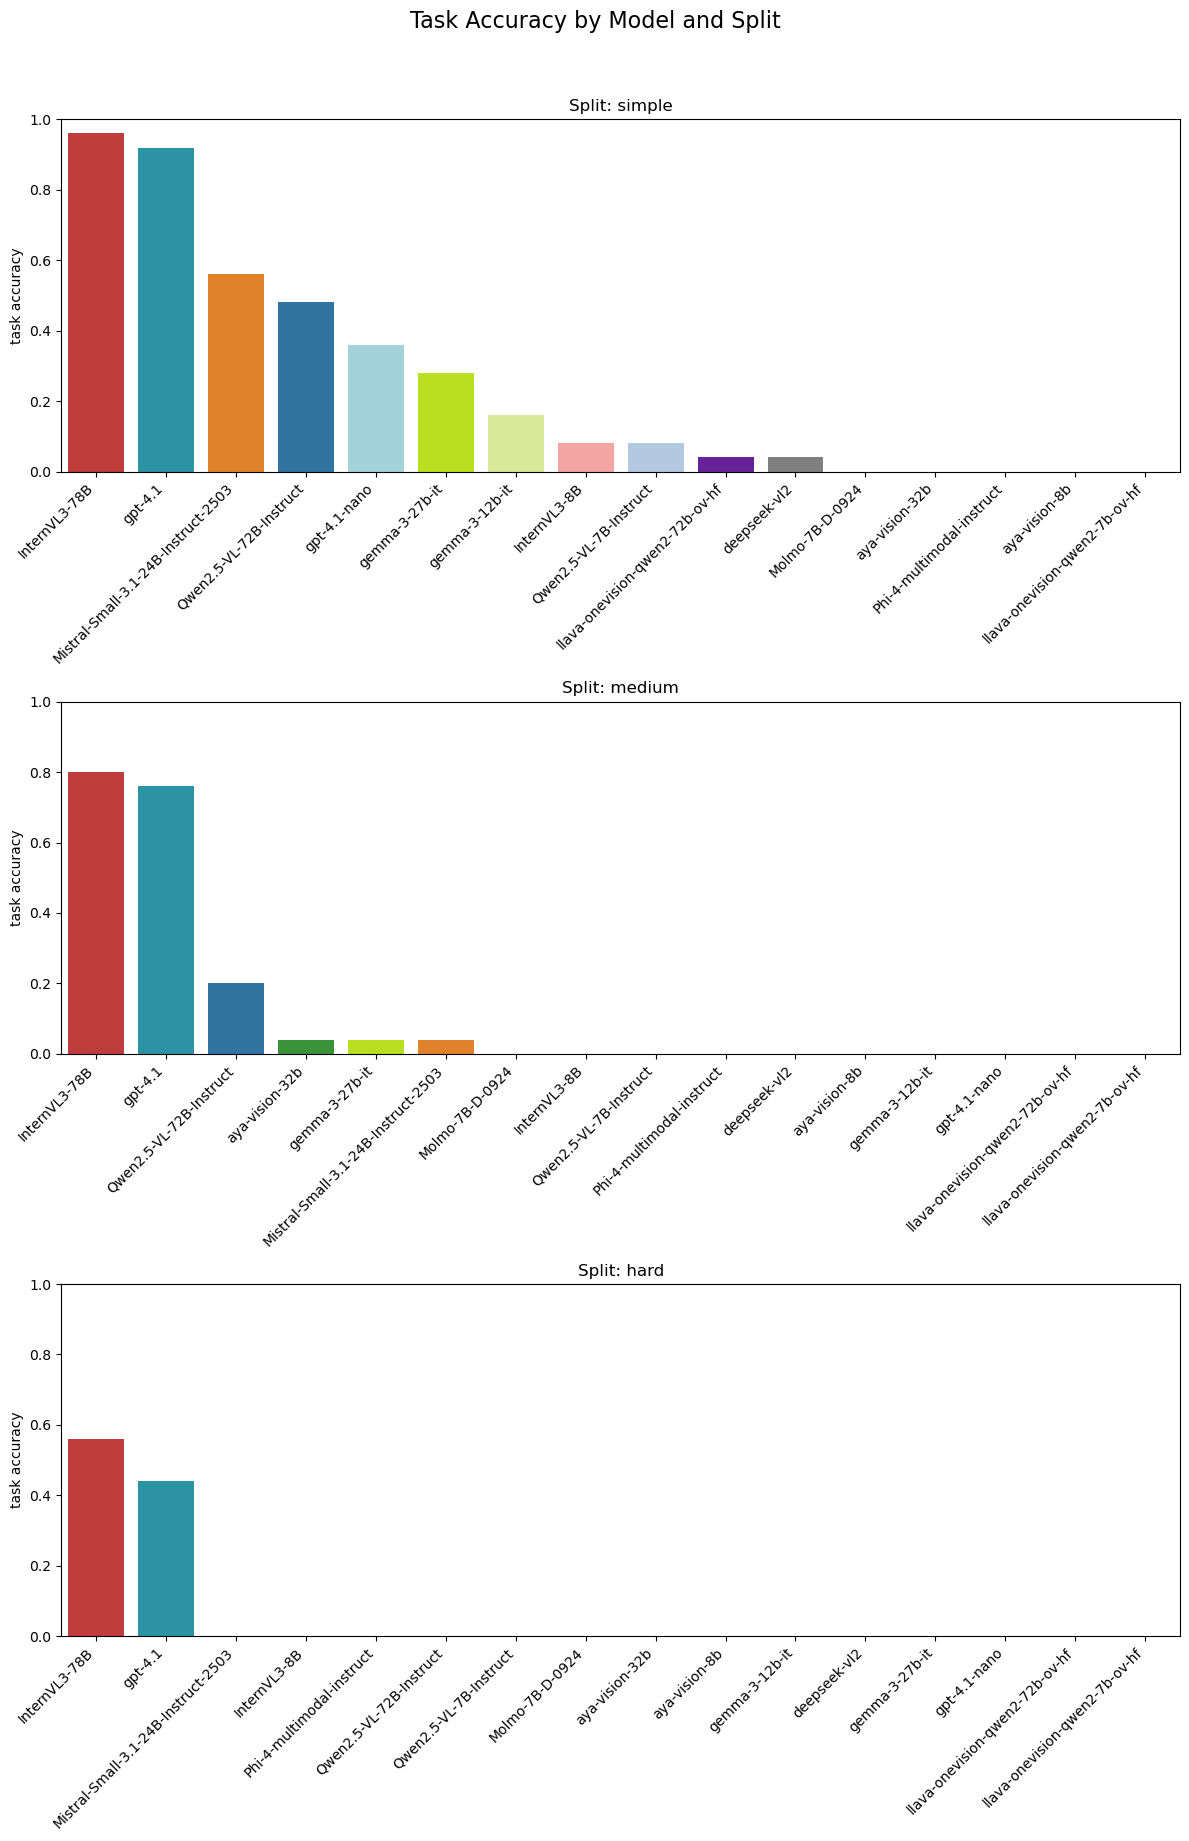

In [27]:
plot_task_accuracy_bar(main_table_predicates_cot)

In [28]:
plot_radar_main_table(main_table_predicates_cot)

NameError: name 'plot_radar_main_table' is not defined

/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


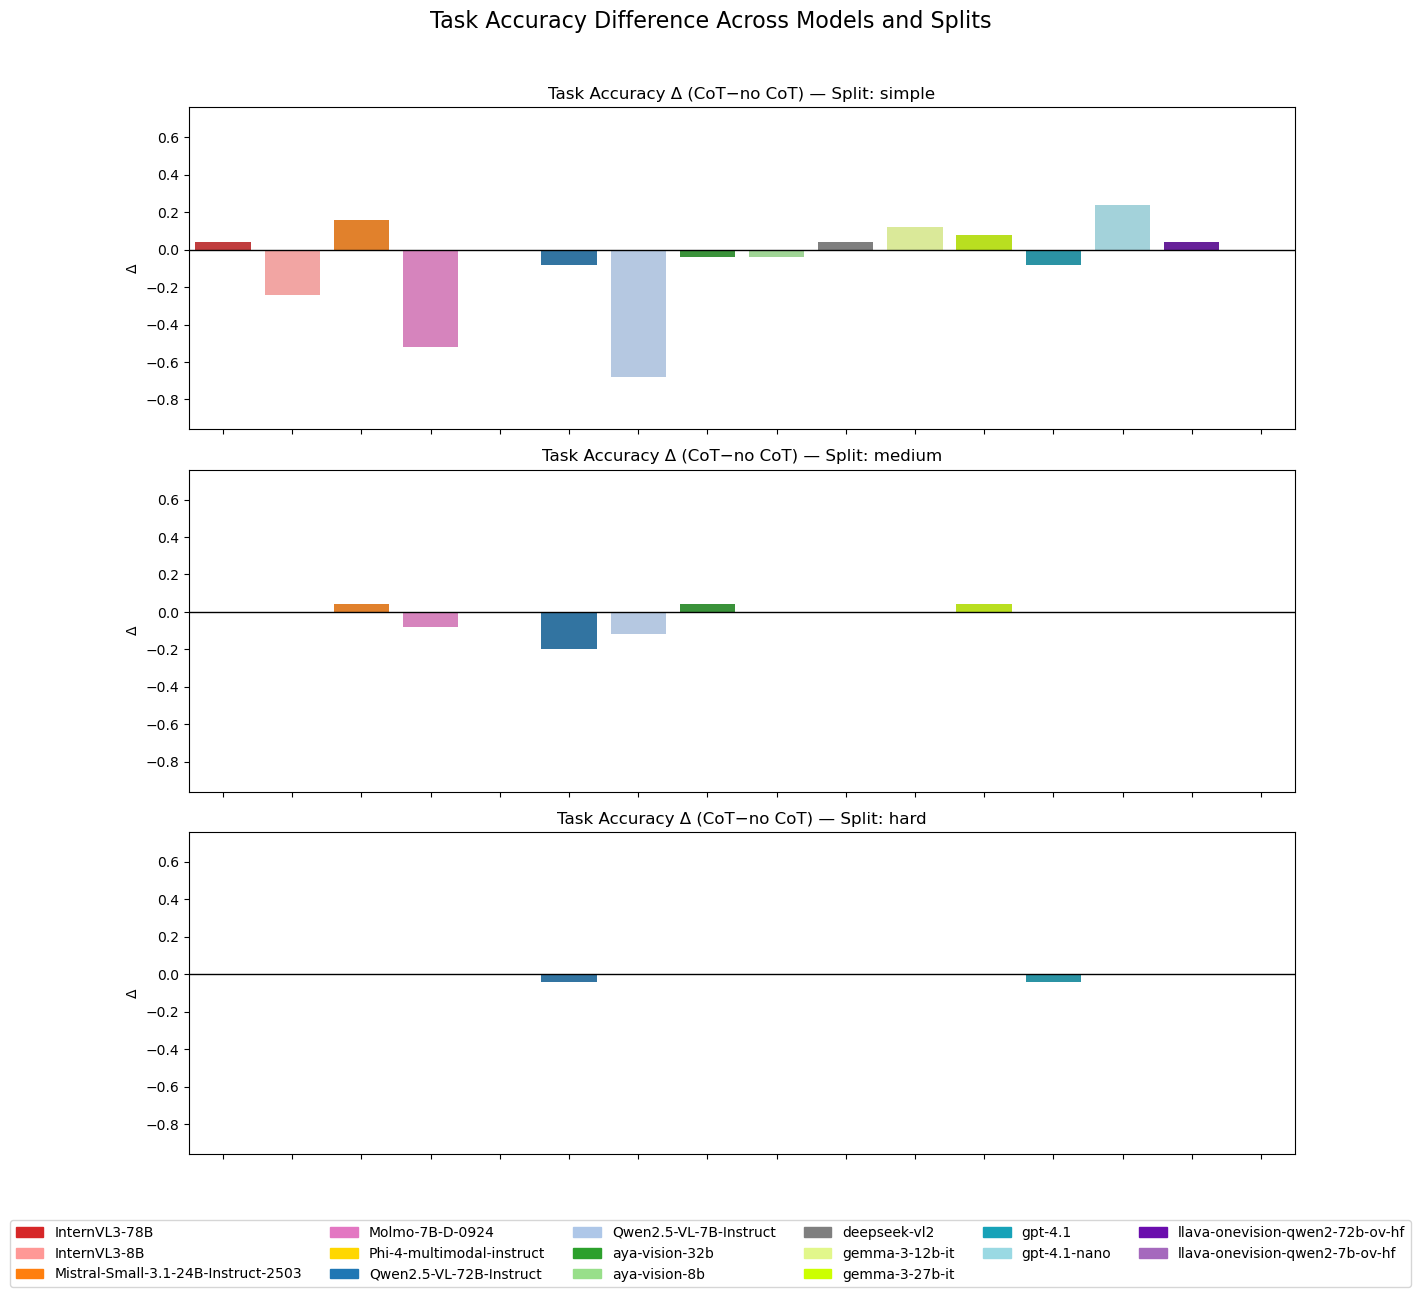

/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


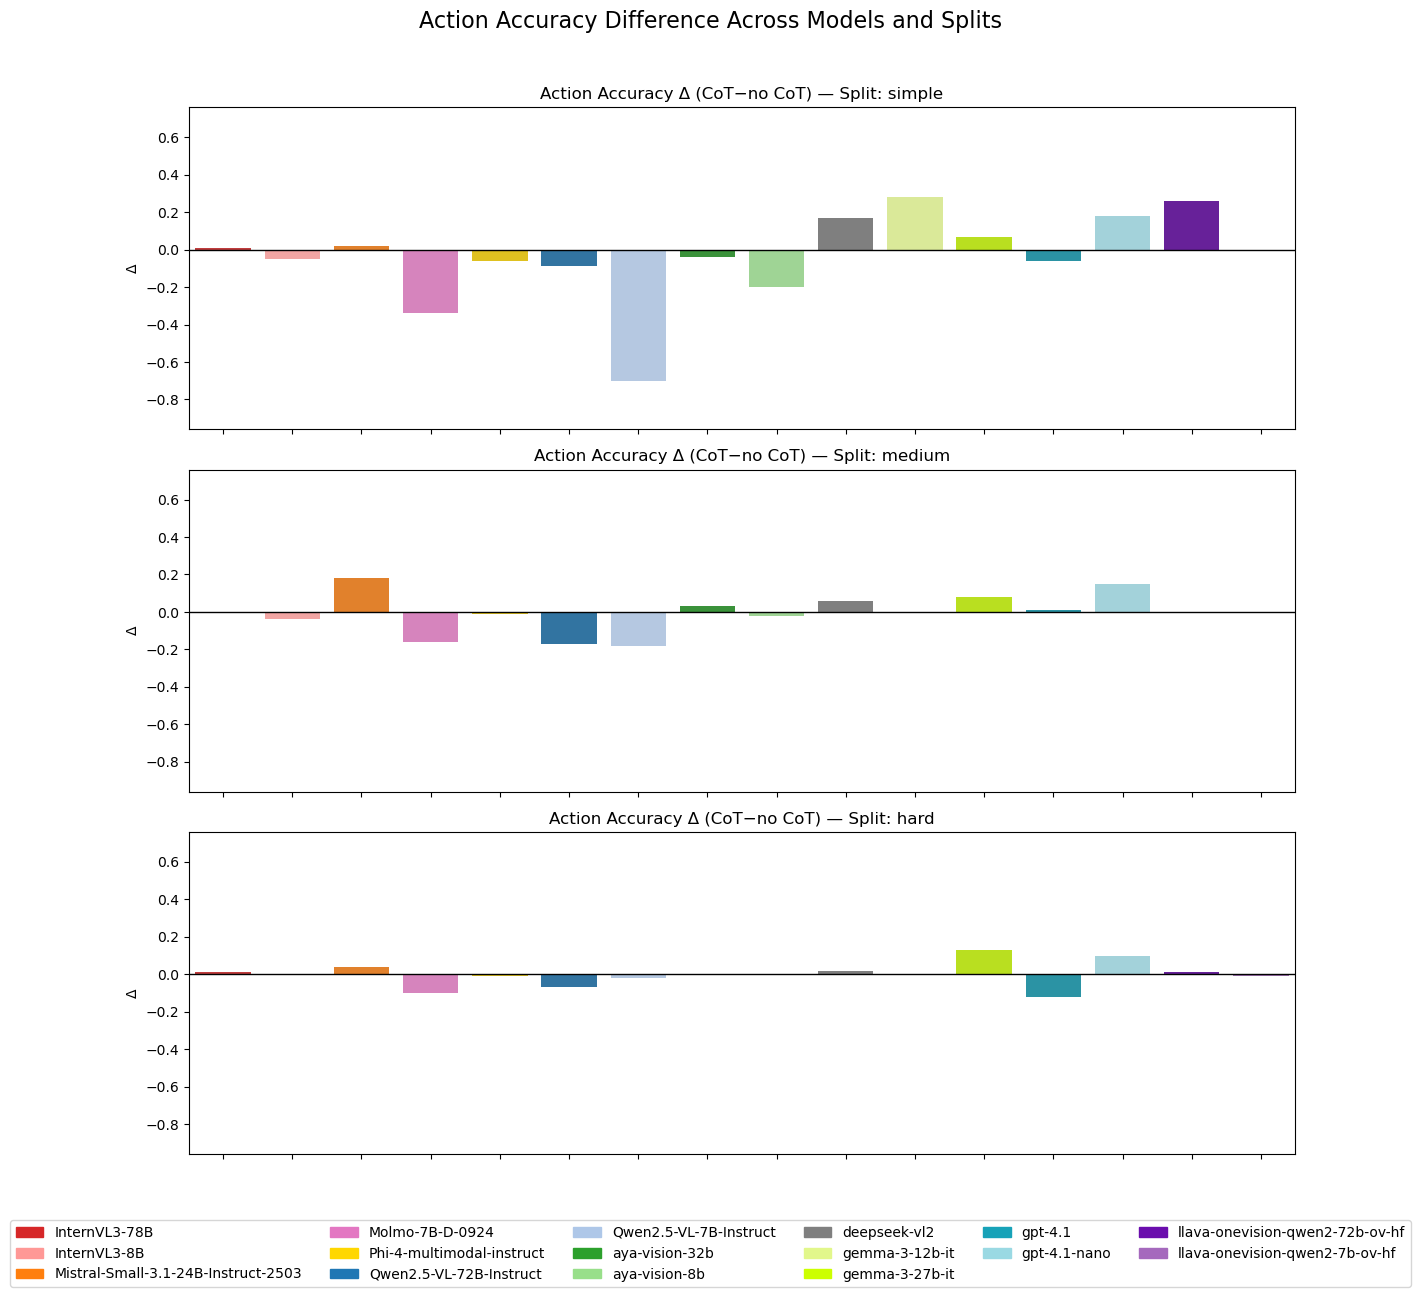

/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


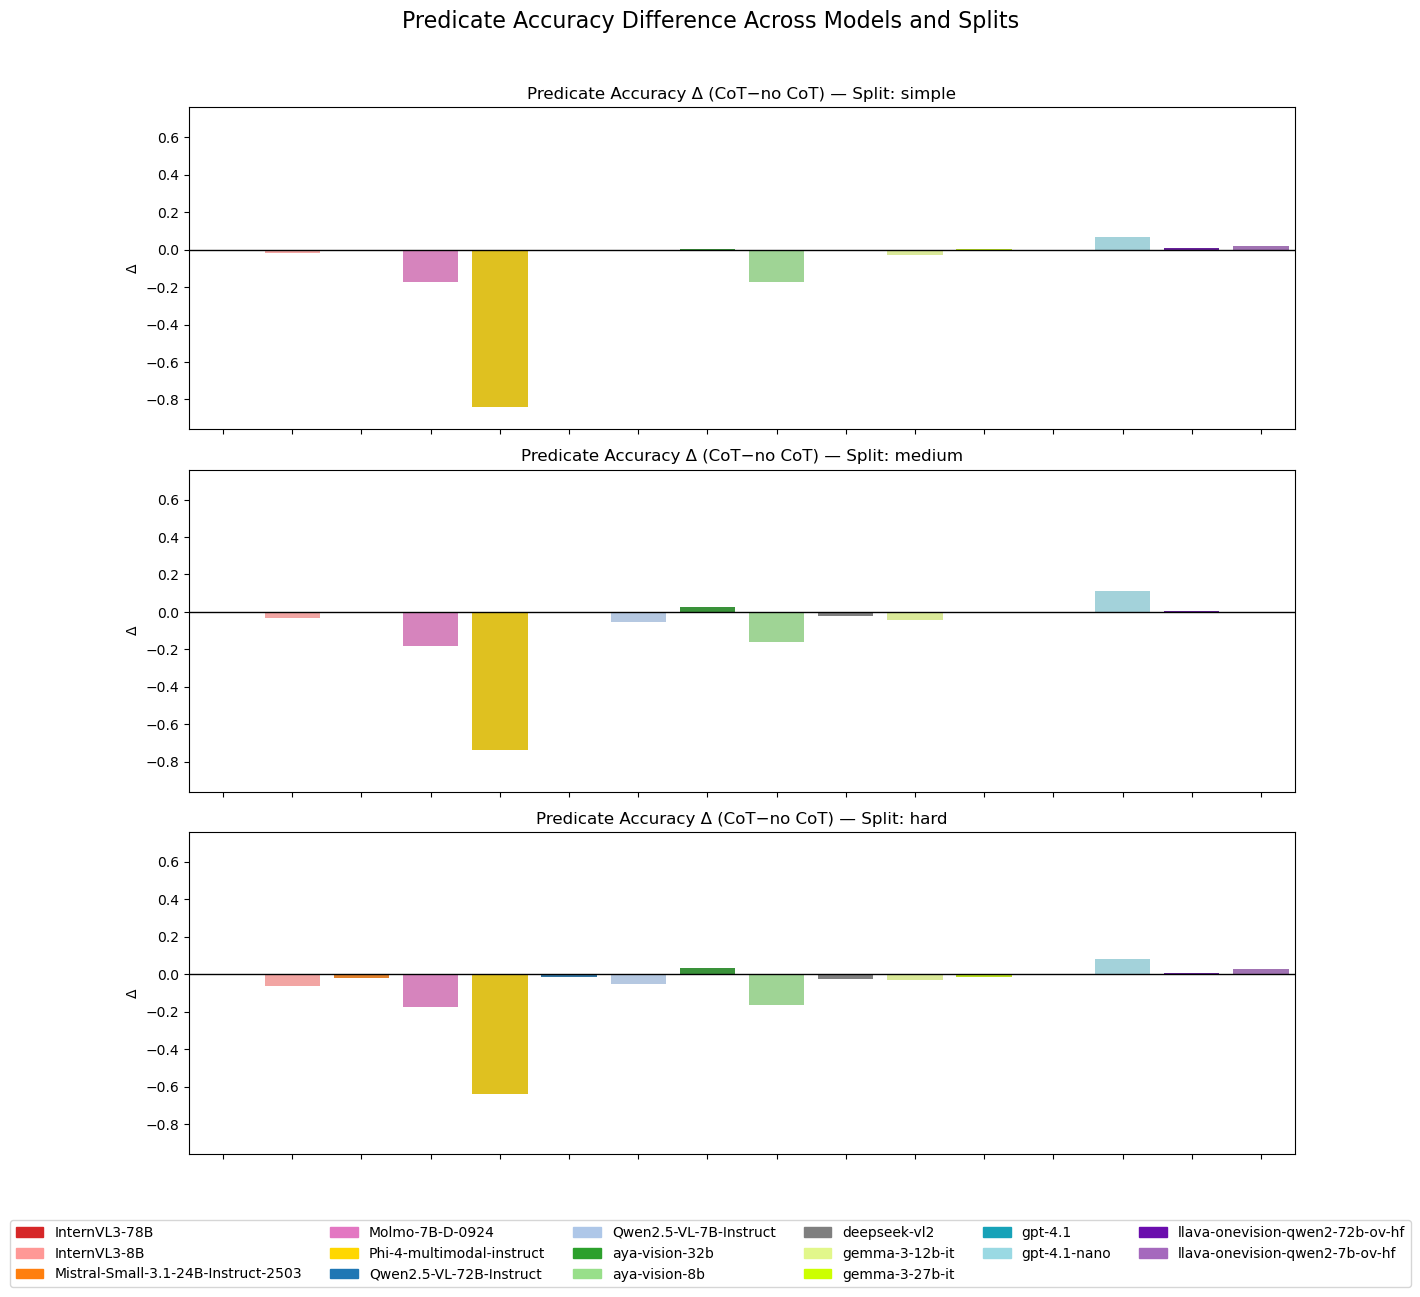

/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3632756/3171098816.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


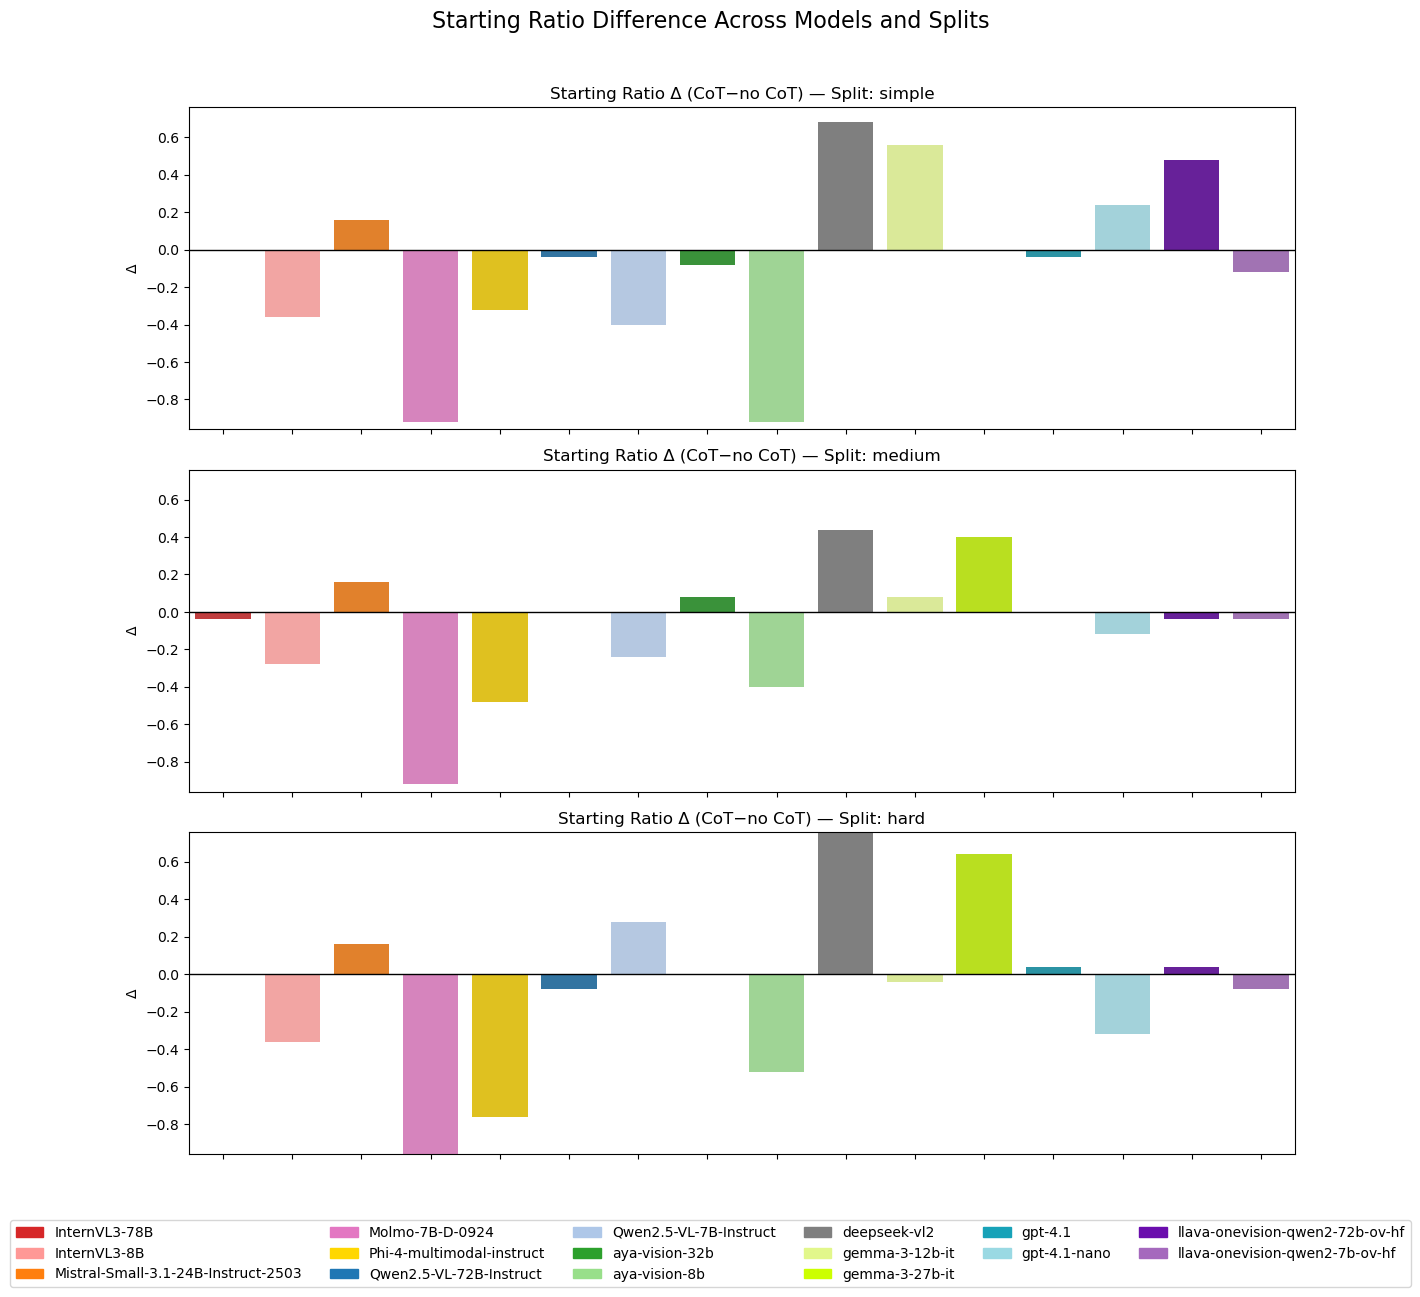

In [29]:
from matplotlib.patches import Patch

# select the four metrics in both tables
cols = [
    'model','split',
    'task accuracy','action accuracy','predicate accuracy','starting ratio'
]

df_no  = predicates_main_table[cols]
df_cot = main_table_predicates_cot[cols]

# merge and compute diffs
df_diff = pd.merge(df_no, df_cot, on=['model','split'], suffixes=('_no','_cot'))
df_diff['task_diff']        = df_diff['task accuracy_cot']      - df_diff['task accuracy_no']
df_diff['action_diff']      = df_diff['action accuracy_cot']    - df_diff['action accuracy_no']
df_diff['predicate_diff']   = df_diff['predicate accuracy_cot'] - df_diff['predicate accuracy_no']
df_diff['start_ratio_diff'] = df_diff['starting ratio_cot']     - df_diff['starting ratio_no']

metrics = ['task_diff','action_diff','predicate_diff','start_ratio_diff']
titles  = ['Task Accuracy','Action Accuracy','Predicate Accuracy','Starting Ratio']

# global y‐axis limits
max_diff = df_diff[metrics].max().max()
min_diff = df_diff[metrics].min().min()

# models in this diff‐table
models = sorted(df_diff['model'].unique())

for metric, title in zip(metrics, titles):
    fig, axes = plt.subplots(len(splits), 1, figsize=(12, 4*len(splits)), sharex=True)
    for ax, split in zip(axes, splits):
        sub = df_diff[df_diff['split'] == split]
        sns.barplot(
            data=sub,
            x='model', y=metric,
            palette=color_map,
            ax=ax
        )
        ax.axhline(0, color='k', linewidth=1)
        ax.set_title(f"{title} Δ (CoT−no CoT) — Split: {split}")
        ax.set_ylabel("Δ")
        ax.set_xlabel("")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_ylim(min_diff, max_diff)
    # legend from color_map
    handles = [Patch(color=color_map[m], label=m) for m in models]
    fig.legend(
        handles=handles,
        labels=models,
        loc='lower center',
        ncol=int(np.ceil(len(models)/3)),
        bbox_to_anchor=(0.5, -0.05)
    )
    fig.suptitle(f"{title} Difference Across Models and Splits", y=1.02, fontsize=16)
    plt.tight_layout(rect=[0,0.05,1,1])
    plt.show()


## ViLa

In [ ]:
vila_models = list_models(vila_results)

In [ ]:
def construct_vila_table(results):
    rows = []
    for split in splits:
        for model, data in results.get(split, {}).items():
            problem_keys = [k for k in data.keys() if isinstance(data[k], dict) and 'actions' in data[k]]
            avg_plan_length = np.mean([len(data[k]['actions']) for k in problem_keys])
            avg_success_plan_length = np.mean([len(data[k]['actions']) for k in problem_keys if data[k]['completed']])
            rows.append({
                'model': model,
                'split': split,
                'avg_plan_length': avg_plan_length,
                'avg_success_plan_length': avg_success_plan_length,
                **data['statistics']
            })
    df = pd.DataFrame(rows)
    df['split'] = pd.Categorical(df['split'], categories=['simple', 'medium', 'hard'], ordered=True)
    df = df.sort_values(by=['model', 'split'])
    return df

vila_main_table = construct_vila_table(vila_results)
vila_main_table

In [ ]:
def plot_vila_task_accuracy_bar(main_table):
    fig, axes = plt.subplots(len(splits), 1, figsize=(12, 18), sharey=True)
    for ax, split in zip(axes, splits):
        df_split = main_table[main_table['split'] == split]
        if df_split.empty:
            ax.set_visible(False)
            continue
        df_sorted = df_split.sort_values('task_completion_rate', ascending=False)
        sns.barplot(
            data=df_sorted,
            x='model', y='task_completion_rate',
            palette=color_map,
            ax=ax
        )
        ax.set_title(f"Split: {split}")
        ax.set_ylim(0, 1)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_xlabel('')
    fig.suptitle("Vila Task Accuracy by Model and Split", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_vila_task_accuracy_bar(vila_main_table)

In [ ]:
# Compare task accuracy between Predicates and ViLa
df_compare = pd.merge(
    predicates_main_table[['model', 'split', 'task accuracy']],
    vila_main_table[['model', 'split', 'task_completion_rate']],
    on=['model', 'split']
).rename(columns={
    'task accuracy': 'Predicates',
    'task_completion_rate': 'ViLa'
})

df_long = df_compare.melt(
    id_vars=['model', 'split'],
    value_vars=['Predicates', 'ViLa'],
    var_name='Method',
    value_name='Score'
)

sns.set(style="whitegrid")
g = sns.catplot(
    data=df_long,
    x='model', y='Score',
    hue='Method', row='split',
    kind='bar',
    height=4, aspect=3,
    sharey=True,  # keep y shared
    sharex=False  # disable shared x so every facet draws its own ticks
)
g.set_titles("Split: {row_name}")
g.set_axis_labels("Model", "Score")
g.set(ylim=(0, 1))

# ensure every subplot shows its x‐ticks
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelbottom=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Random policy baseline for vila

In [ ]:
from viplan.code_helpers import get_logger
from viplan.planning.blocksworld_simulator import BlocksworldSimulator
from unified_planning.io import PDDLReader

import random

In [ ]:
from tqdm import tqdm

def get_env(domain, problem):
    reader = PDDLReader()
    problem = reader.parse_problem(domain, problem)
    logger = get_logger(log_level='error')
    env = BlocksworldSimulator(problem, root_path=ROOT, logger=logger, seed=1, use_gpu_rendering=False)
    return env

def random_policy(domain, problem, max_steps=50, seed=None):
    """
    A random policy that takes random actions until the problem is solved or max_steps is reached.
    """
    env = get_env(domain, problem)
    
    fail_counter = 0
    steps = 0
    
    random.seed(seed)
    
    while not env.goal_reached and steps < max_steps:
        steps += 1
        blocks = env.all_objects['block']
        columns = env.all_objects['column']

        b = str(random.choice(blocks))
        c = str(random.choice(columns))
        action = env._get_specific_action(b, c)
        success, info = env.apply_action(action)
        
        if not success:
            fail_counter += 1

    if env.goal_reached:
        return True, steps, fail_counter
    return False, steps, fail_counter

def get_random_baseline(domain, split, runs_per_problem=100, max_steps=50, seed=None):
    """
    Get the random baseline for a given domain and split.
    """
    problems_folder = os.path.join(ROOT, 'data', 'planning', 'blocksworld', 'problems', split)
    problems = [f for f in os.listdir(problems_folder) if f.endswith('.pddl')]
    
    results = {}
    for problem in tqdm(problems, desc=f"Random baseline problems ({split})", unit="problem"):
        results[problem] = []
        problem_path = os.path.join(problems_folder, problem)
        for _ in tqdm(range(runs_per_problem), desc=f"Runs for {problem}", unit="run", leave=False):
            success, steps, fail_counter = random_policy(
                domain, problem_path, max_steps=max_steps, seed=seed
            )
            results[problem].append({
                'success': success,
                'steps': steps,
                'fail_counter': fail_counter
            })
            
    # Compute statistics per problem
    stats_per_problem = {}
    all_success, all_steps, all_fail = [], [], []
    for problem, runs in results.items():
        successes = [r['success'] for r in runs]
        steps = [r['steps'] for r in runs]
        fails = [r['fail_counter'] for r in runs]
        stats_per_problem[problem] = {
            'success_rate': np.mean(successes),
            'steps_mean': np.mean(steps),
            'steps_std': np.std(steps),
            'fail_counter_mean': np.mean(fails),
            'fail_counter_std': np.std(fails),
        }
        all_success.extend(successes)
        all_steps.extend(steps)
        all_fail.extend(fails)

    # Overall statistics
    overall_stats = {
        'success_rate': np.mean(all_success),
        'steps_mean': np.mean(all_steps),
        'steps_std': np.std(all_steps),
        'fail_counter_mean': np.mean(all_fail),
        'fail_counter_std': np.std(all_fail),
    }

    return stats_per_problem, overall_stats

In [ ]:
domain_file = os.path.join(ROOT, 'data', 'planning', 'blocksworld', 'domain.pddl')

random_baselines = {}
for split in splits:
    max_steps = 10 if split == 'simple' else 20 if split == 'medium' else 30
    stats_per_problem, overall_stats = get_random_baseline(domain_file, split, runs_per_problem=100, max_steps=max_steps, seed=1)
    print(f"Split: {split}")
    print("Overall statistics:")
    print(overall_stats)
    print()
    random_baselines[split] = (overall_stats, stats_per_problem)

## ViLa w/CoT

In [ ]:
vila_folder_cot = os.path.join(experiment_folder_cot, 'vila')
vila_results_cot = load_results(vila_folder_cot)

In [ ]:
vila_models_cot = list_models(vila_results_cot)

In [ ]:
vila_main_table_cot = construct_vila_table(vila_results_cot)
vila_main_table_cot

In [ ]:
plot_vila_task_accuracy_bar(vila_main_table_cot)

In [ ]:
# Compute the difference in task completion rate between CoT and no CoT
df_vila_diff = pd.merge(
    vila_main_table[['model', 'split', 'task_completion_rate']],
    vila_main_table_cot[['model', 'split', 'task_completion_rate']],
    on=['model', 'split'],
    suffixes=('_no', '_cot')
)
df_vila_diff['task_completion_rate_diff'] = (
    df_vila_diff['task_completion_rate_cot'] - df_vila_diff['task_completion_rate_no']
)

# Plot the difference for each split
fig, axes = plt.subplots(len(splits), 1, figsize=(12, 4 * len(splits)), sharex=True)
for ax, split in zip(axes, splits):
    sub = df_vila_diff[df_vila_diff['split'] == split]
    sns.barplot(
        data=sub,
        x='model', y='task_completion_rate_diff',
        palette=color_map,
        ax=ax
    )
    ax.axhline(0, color='k', linewidth=1)
    ax.set_title(f"ViLa Task Completion Rate Δ (CoT − no CoT) — Split: {split}")
    ax.set_ylabel("Δ")
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a legend
handles = [Patch(color=color_map[m], label=m) for m in sorted(df_vila_diff['model'].unique())]
fig.legend(
    handles=handles,
    labels=[h.get_label() for h in handles],
    loc='lower center',
    ncol=int(np.ceil(len(handles) / 3)),
    bbox_to_anchor=(0.5, -0.05)
)
fig.suptitle("ViLa Task Completion Rate Difference Between CoT and no CoT", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

## Predicates VS ViLa

In [ ]:
# Compute the delta between Predicates task accuracy and ViLa task completion rate
df_pred_vila_diff = pd.merge(
    predicates_main_table[['model', 'split', 'task accuracy']],
    vila_main_table[['model', 'split', 'task_completion_rate']],
    on=['model', 'split']
).rename(columns={
    'task accuracy': 'Predicates',
    'task_completion_rate': 'ViLa'
})
df_pred_vila_diff['delta'] = df_pred_vila_diff['Predicates'] - df_pred_vila_diff['ViLa']

# Plot a 3×1 grid of barplots (one per split) showing Predicates−ViLa Δ
fig, axes = plt.subplots(len(splits), 1, figsize=(12, 4 * len(splits)), sharex=True)
for ax, split in zip(axes, splits):
    sub = df_pred_vila_diff[df_pred_vila_diff['split'] == split] \
              .sort_values('delta', ascending=False)
    sns.barplot(
        data=sub,
        x='model', y='delta',
        palette=color_map,
        ax=ax
    )
    ax.axhline(0, color='k', linewidth=1)
    ax.set_title(f"Task Accuracy Δ (Predicates − ViLa) — Split: {split}")
    ax.set_ylabel("Δ")
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Compute the delta between Predicates CoT task accuracy and ViLa CoT task completion rate
df_pred_vila_cot_diff = pd.merge(
    main_table_predicates_cot[['model', 'split', 'task accuracy']],
    vila_main_table_cot[['model', 'split', 'task_completion_rate']],
    on=['model', 'split']
).rename(columns={
    'task accuracy': 'Predicates',
    'task_completion_rate': 'ViLa'
})
df_pred_vila_cot_diff['delta'] = df_pred_vila_cot_diff['Predicates'] - df_pred_vila_cot_diff['ViLa']

# Plot a 3×1 grid of barplots (one per split) showing Predicates CoT − ViLa CoT Δ
fig, axes = plt.subplots(len(splits), 1, figsize=(12, 4 * len(splits)), sharex=True)
for ax, split in zip(axes, splits):
    sub = (
        df_pred_vila_cot_diff[df_pred_vila_cot_diff['split'] == split]
        .sort_values('delta', ascending=False)
    )
    sns.barplot(
        data=sub,
        x='model', y='delta',
        palette=color_map,
        ax=ax
    )
    ax.axhline(0, color='k', linewidth=1)
    ax.set_title(f"Task Accuracy Δ (Predicates CoT − ViLa CoT) — Split: {split}")
    ax.set_ylabel("Δ")
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()